In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

Gender  Ageatscreening  Diagnosis  MMSE0m  HipsASMbaseline  \
0       0         81.3479          2    20.0              NaN   
1       0         67.6904          1    27.0             0.06   
2       0         73.8027          0    29.0             0.10   
3       1         84.5945          0    28.0             0.08   
4       1         73.9726          2    24.0             0.11   

   HipsContrastbaseline  HipsCorelationbaseline  HipsVariancebaseline  \
0                158.27                    0.63                218.30   
1                147.64                    0.55                173.64   
2                199.66                    0.55                222.27   
3                184.21                    0.53                201.55   
4                233.02                    0.48                229.88   

   HipsSumAveragebaseline  HipsSumVariancebaseline  ...  ERCsContrastbaseline  \
0                   28.37                   714.92  ...                253.10   
1                   44.72                   546.93  ...                220.88   
2                   41.18                   689.44  ...                220.37   
3                   43.04                   622.01  ...                198.42   
4                   39.46                   686.51  ...                196.55   

   ERCsCorelationbaseline  ERCsVariancebaseline  ERCsSumAveragebaseline  \
0                    0.40                208.65                   23.39   
1                    0.48                215.70                   33.74   
2                    0.54                232.18                   29.18   
3                    0.54                220.48                   26.68   
4                    0.53                210.63                   26.60   

   ERCsSumVariancebaseline  ERCsEntropybaseline  ERCsClusterShadebaseline  \
0                   581.50                  NaN                  -2568.19   
1                   641.90                 3.33                   4113.01   
2                   708.36                 2.87                  -1388.41   
3                   683.50                 2.77                  -2506.55   
4                   645.95                 2.72                  -1164.02   

   ERCs_thicknessbaseline  ERCsVolumebaseline  HipposcampusVolumebaseline  
0                    2.31              1176.0                      3047.0  
1                    2.76              1942.0                      3449.0  
2                    3.18              2044.0                      3441.0  
3                    2.68              1959.0                      2875.0  
4                    2.64              1397.0                      2700.0  

[5 rows x 23 columns]

In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
ERCsASMbaseline                3
MMSE0m                         3
HipsVariancebaseline           5
HipsSumVariancebaseline        6
ERCsEntropybaseline            9
ERCsSumVariancebaseline       10
ERCsVolumebaseline            11
ERCsSumAveragebaseline        11
ERCsVariancebaseline          12
HipsContrastbaseline          13
HipposcampusVolumebaseline    16
ERCsContrastbaseline          17
HipsClusterShadebaseline      17
HipsCorelationbaseline        19
HipsEntropybaseline           21
ERCsClusterShadebaseline      21
ERCsCorelationbaseline        25
HipsASMbaseline               25
ERCs_thicknessbaseline        34
dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train.shape, X_test.shape

((366, 22), (158, 22))

In [5]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0,
)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=10),
    max_iter=10,
    random_state=0,
)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
    max_iter=10,
    random_state=0,
)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0,
)

In [6]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)

imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 random_state=0)

In [7]:
# replace NA
X_train_bayes = imputer_bayes.transform(X_train)
X_test_bayes = imputer_bayes.transform(X_test)

X_train_knn = imputer_knn.transform(X_train)
X_test_knn = imputer_knn.transform(X_test)

X_train_nonLin = imputer_nonLin.transform(X_train)
X_test_nonLin = imputer_nonLin.transform(X_test)

X_train_missForest = imputer_missForest.transform(X_train)
X_test_missForest = imputer_missForest.transform(X_test)

In [8]:
X_train_bayes_t = pd.DataFrame(X_train_bayes, columns=X_train.columns)
X_test_bayes_t = pd.DataFrame(X_test_bayes, columns=X_test.columns)

X_train_knn_t = pd.DataFrame(X_train_knn, columns=X_train.columns)
X_test_knn_t = pd.DataFrame(X_test_knn, columns=X_test.columns)

X_train_nonLin_t = pd.DataFrame(X_train_nonLin, columns=X_train.columns)
X_test_nonLin_t = pd.DataFrame(X_test_nonLin, columns=X_test.columns)

X_train_missForest_t = pd.DataFrame(X_train_missForest, columns=X_train.columns)
X_test_missForest_t = pd.DataFrame(X_test_missForest, columns=X_test.columns)

In [9]:
dataframes = [
    X_train_bayes_t, X_test_bayes_t, 
    X_train_knn_t, X_test_knn_t,
    X_train_nonLin_t, X_test_nonLin_t,
    X_train_missForest_t, X_test_missForest_t,
]

for df in dataframes:
    if df.isna().any().all() == False:
        print("No missing values in any dataframe")
        break
    else:
        print("Still missing values")

No missing values in any dataframe


### Check for normal distribution and skewness change 

In [10]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

def check_normality(dataset):
    
    results = {}

    for column in dataset.columns:  
        stat, p = shapiro(dataset[column].dropna())
        skewness = skew(dataset[column].dropna())
        kurt = kurtosis(dataset[column].dropna())
        results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    return results_df

In [11]:
X_train_norm = check_normality(X_train)
X_test_norm = check_normality(X_test)

X_train_norm_bayes = check_normality(X_train_bayes_t)
X_test_norm_bayes = check_normality(X_test_bayes_t)

X_train_norm_knn = check_normality(X_train_knn_t)
X_test_norm_knn = check_normality(X_test_knn_t)

X_train_norm_nonlin = check_normality(X_train_nonLin_t)
X_test_norm_nonlin = check_normality(X_test_nonLin_t)

X_train_norm_miss = check_normality(X_train_missForest_t)
X_test_norm_miss = check_normality(X_test_missForest_t)

In [12]:
normal_train_nontree_df = pd.DataFrame({"p-value": X_train_norm["p-value"],
                                "Skewness": X_train_norm["Skewness"],
                                "Kurtosis": X_train_norm["Kurtosis"],
                                "X_train_norm": X_train_norm["Normal"],
                                
                                "p-value_bayes": X_train_norm_bayes["p-value"],
                                "Skewness_bayes": X_train_norm_bayes["Skewness"],
                                "Kurtosis_bayes": X_train_norm_bayes["Kurtosis"],
                                "X_train_bayes_norm": X_train_norm_bayes["Normal"],
                                
                                "p-value_knn": X_train_norm_knn["p-value"],
                                "Skewness_knn": X_train_norm_knn["Skewness"],
                                "Kurtosis_knn": X_train_norm_knn["Kurtosis"],
                                "X_train_knn_norm": X_train_norm_knn["Normal"],
})

normal_train_treebase_df = pd.DataFrame({"p-value": X_train_norm["p-value"],
                                "Skewness": X_train_norm["Skewness"],
                                "Kurtosis": X_train_norm["Kurtosis"],
                                "X_train_norm": X_train_norm["Normal"],
                                
                                "p-value_nonlin": X_train_norm_nonlin["p-value"],
                                "Skewness_nonlin": X_train_norm_nonlin["Skewness"],
                                "Kurtosis_nonlin": X_train_norm_nonlin["Kurtosis"],
                                "X_train_nonlin_norm": X_train_norm_nonlin["Normal"],
                                
                                "p-value_miss": X_train_norm_miss["p-value"],
                                "Skewness_miss": X_train_norm_miss["Skewness"],
                                "Kurtosis_miss": X_train_norm_miss["Kurtosis"],
                                "X_train_miss_norm": X_train_norm_miss["Normal"],
})


normal_test_nontree_df = pd.DataFrame({
                                "p-value": X_test_norm["p-value"],
                                "Skewness": X_test_norm["Skewness"],
                                "Kurtosis": X_test_norm["Kurtosis"],
                                "X_test_norm": X_test_norm["Normal"],
                                
                                "p-value_bayes": X_test_norm_bayes["p-value"],
                                "Skewness_bayes": X_test_norm_bayes["Skewness"],
                                "Kurtosis_bayes": X_test_norm_bayes["Kurtosis"],
                                "X_test_bayes_norm": X_test_norm_bayes["Normal"],
                                
                                "p-value_knn": X_test_norm_knn["p-value"],
                                "Skewness_knn": X_test_norm_knn["Skewness"],
                                "Kurtosis_knn": X_test_norm_knn["Kurtosis"],
                                "X_test_knn_norm": X_test_norm_knn["Normal"],
})

normal_test_treebase_df = pd.DataFrame({"p-value": X_test_norm["p-value"],
                                "Skewness": X_test_norm["Skewness"],
                                "Kurtosis": X_test_norm["Kurtosis"],
                                "X_test_norm": X_test_norm["Normal"],
                                
                                "p-value_nonlin": X_test_norm_nonlin["p-value"],
                                "Skewness_nonlin": X_test_norm_nonlin["Skewness"],
                                "Kurtosis_nonlin": X_test_norm_nonlin["Kurtosis"],
                                "X_test_nonlin_norm": X_test_norm_nonlin["Normal"],
                                
                                "p-value_miss": X_test_norm_miss["p-value"],
                                "Skewness_miss": X_test_norm_miss["Skewness"],
                                "Kurtosis_miss": X_test_norm_miss["Kurtosis"],
                                "X_test_miss_norm": X_test_norm_miss["Normal"],
})

In [13]:
normal_train_nontree_df

p-value  Skewness  Kurtosis X_train_norm  \
Gender                           0.0  0.032791 -1.998925        False   
Ageatscreening              0.001044 -0.365262 -0.005431        False   
MMSE0m                           0.0 -0.910015  0.054355        False   
HipsASMbaseline                  0.0  0.537834 -0.173913        False   
HipsContrastbaseline        0.697206  0.068262 -0.266752         True   
HipsCorelationbaseline           0.0 -0.523859 -0.294367        False   
HipsVariancebaseline             0.0 -0.666353 -0.337171        False   
HipsSumAveragebaseline      0.011007 -0.189935 -0.340284        False   
HipsSumVariancebaseline          0.0 -0.702603 -0.280969        False   
HipsEntropybaseline          0.00319 -0.416564  0.182257        False   
HipsClusterShadebaseline         0.0   0.61156 -0.487028        False   
ERCsASMbaseline             0.010221  0.167033 -0.326928        False   
ERCsContrastbaseline         0.19889  0.206155 -0.225017         True   
ERCsCorelationbaseline      0.003963 -0.222229 -0.357489        False   
ERCsVariancebaseline        0.022329 -0.298189 -0.129806        False   
ERCsSumAveragebaseline      0.438705  0.116477 -0.194021         True   
ERCsSumVariancebaseline     0.000337 -0.431908 -0.173084        False   
ERCsEntropybaseline          0.25187 -0.057875 -0.273291         True   
ERCsClusterShadebaseline         0.0  0.522582 -0.477522        False   
ERCs_thicknessbaseline      0.298662  0.064931 -0.051658         True   
ERCsVolumebaseline          0.004681 -0.065994 -0.694873        False   
HipposcampusVolumebaseline  0.038439 -0.023095 -0.631467        False   

                           p-value_bayes Skewness_bayes Kurtosis_bayes  \
Gender                               0.0       0.032791      -1.998925   
Ageatscreening                  0.001044      -0.365262      -0.005431   
MMSE0m                               0.0      -0.912205       0.068812   
HipsASMbaseline                      0.0       0.776262       0.213018   
HipsContrastbaseline            0.011935       0.368857       0.384648   
HipsCorelationbaseline               0.0      -0.714695        0.22158   
HipsVariancebaseline                 0.0      -0.649688      -0.362539   
HipsSumAveragebaseline          0.010047      -0.188051      -0.355457   
HipsSumVariancebaseline              0.0      -0.709924      -0.255004   
HipsEntropybaseline                  0.0      -0.701426       0.451893   
HipsClusterShadebaseline             0.0       0.706044      -0.232268   
ERCsASMbaseline                 0.007686       0.175306      -0.323049   
ERCsContrastbaseline            0.000079       0.508125       0.206029   
ERCsCorelationbaseline          0.000004       -0.58269       0.255062   
ERCsVariancebaseline            0.023202      -0.310703      -0.088638   
ERCsSumAveragebaseline          0.371725       0.100173      -0.292385   
ERCsSumVariancebaseline         0.000103      -0.510425       0.062623   
ERCsEntropybaseline             0.316551      -0.109411      -0.082361   
ERCsClusterShadebaseline        0.000001       0.468093      -0.535922   
ERCs_thicknessbaseline            0.5176       0.046175      -0.093113   
ERCsVolumebaseline              0.003855      -0.106324      -0.680495   
HipposcampusVolumebaseline       0.02669       0.010337      -0.651269   

                           X_train_bayes_norm p-value_knn Skewness_knn  \
Gender                                  False         0.0     0.032791   
Ageatscreening                          False    0.001044    -0.365262   
MMSE0m                                  False         0.0    -0.909693   
HipsASMbaseline                         False         0.0     0.478155   
HipsContrastbaseline                    False    0.772911     0.050432   
HipsCorelationbaseline                  False    0.000001     -0.47096   
HipsVariancebaseline                    False         0.0    -0.636966   
HipsSumAveragebaseline                  False    0.009

In [14]:
normal_train_treebase_df

p-value  Skewness  Kurtosis X_train_norm  \
Gender                           0.0  0.032791 -1.998925        False   
Ageatscreening              0.001044 -0.365262 -0.005431        False   
MMSE0m                           0.0 -0.910015  0.054355        False   
HipsASMbaseline                  0.0  0.537834 -0.173913        False   
HipsContrastbaseline        0.697206  0.068262 -0.266752         True   
HipsCorelationbaseline           0.0 -0.523859 -0.294367        False   
HipsVariancebaseline             0.0 -0.666353 -0.337171        False   
HipsSumAveragebaseline      0.011007 -0.189935 -0.340284        False   
HipsSumVariancebaseline          0.0 -0.702603 -0.280969        False   
HipsEntropybaseline          0.00319 -0.416564  0.182257        False   
HipsClusterShadebaseline         0.0   0.61156 -0.487028        False   
ERCsASMbaseline             0.010221  0.167033 -0.326928        False   
ERCsContrastbaseline         0.19889  0.206155 -0.225017         True   
ERCsCorelationbaseline      0.003963 -0.222229 -0.357489        False   
ERCsVariancebaseline        0.022329 -0.298189 -0.129806        False   
ERCsSumAveragebaseline      0.438705  0.116477 -0.194021         True   
ERCsSumVariancebaseline     0.000337 -0.431908 -0.173084        False   
ERCsEntropybaseline          0.25187 -0.057875 -0.273291         True   
ERCsClusterShadebaseline         0.0  0.522582 -0.477522        False   
ERCs_thicknessbaseline      0.298662  0.064931 -0.051658         True   
ERCsVolumebaseline          0.004681 -0.065994 -0.694873        False   
HipposcampusVolumebaseline  0.038439 -0.023095 -0.631467        False   

                           p-value_nonlin Skewness_nonlin Kurtosis_nonlin  \
Gender                                0.0        0.032791       -1.998925   
Ageatscreening                   0.001044       -0.365262       -0.005431   
MMSE0m                                0.0       -0.904204          0.0551   
HipsASMbaseline                       0.0        0.548768       -0.291377   
HipsContrastbaseline             0.216988         0.09944       -0.330376   
HipsCorelationbaseline                0.0       -0.500387       -0.403405   
HipsVariancebaseline                  0.0       -0.672048       -0.351379   
HipsSumAveragebaseline           0.011665       -0.185193        -0.34029   
HipsSumVariancebaseline               0.0       -0.704655       -0.300325   
HipsEntropybaseline              0.001271       -0.393077       -0.023026   
HipsClusterShadebaseline              0.0        0.592439       -0.583534   
ERCsASMbaseline                  0.007532        0.162359       -0.364322   
ERCsContrastbaseline             0.067725         0.23185       -0.241922   
ERCsCorelationbaseline            0.00036       -0.239924       -0.471033   
ERCsVariancebaseline             0.010971       -0.304054        -0.16361   
ERCsSumAveragebaseline           0.312545        0.134576       -0.184189   
ERCsSumVariancebaseline          0.000333       -0.415781       -0.229692   
ERCsEntropybaseline              0.157496       -0.070788       -0.328481   
ERCsClusterShadebaseline              0.0        0.502034       -0.526309   
ERCs_thicknessbaseline            0.18483       -0.002778       -0.053635   
ERCsVolumebaseline               0.003551       -0.091911       -0.690282   
HipposcampusVolumebaseline       0.014741        0.004206       -0.676851   

                           X_train_nonlin_norm p-value_miss Skewness_miss  \
Gender                                   False          0.0      0.032791   
Ageatscreening                           False     0.001044     -0.365262   
MMSE0m                                   False          0.0     -0.912538   
HipsASMbaseline                          False          0.0      0.543293   
HipsContrastbaseline                      True     0.158513       0.12228   
HipsCorelationbaseline                   False          0.0     -0.472494   
HipsVariancebaseline                  

In [15]:
print("Total normal distribution count for X_train_norm")
print(normal_train_nontree_df["X_train_norm"].value_counts())

print("\nTotal normal distribution count for X_train_bayes_norm")
print(normal_train_nontree_df["X_train_bayes_norm"].value_counts())

print("Total normal distribution count for X_train_knn_norm")
print(normal_train_nontree_df["X_train_knn_norm"].value_counts())

print("\nTotal normal distribution count for X_train_nonlin_norm")
print(normal_train_treebase_df["X_train_nonlin_norm"].value_counts())

print("Total normal distribution count for X_train_miss_norm")
print(normal_train_treebase_df["X_train_miss_norm"].value_counts())

Total normal distribution count for X_train_norm
X_train_norm
False    17
True      5
Name: count, dtype: int64

Total normal distribution count for X_train_bayes_norm
X_train_bayes_norm
False    19
True      3
Name: count, dtype: int64
Total normal distribution count for X_train_knn_norm
X_train_knn_norm
False    16
True      6
Name: count, dtype: int64

Total normal distribution count for X_train_nonlin_norm
X_train_nonlin_norm
False    17
True      5
Name: count, dtype: int64
Total normal distribution count for X_train_miss_norm
X_train_miss_norm
False    17
True      5
Name: count, dtype: int64


In [16]:
normal_test_nontree_df

p-value  Skewness  Kurtosis X_test_norm  \
Gender                           0.0  0.468006  -1.78097       False   
Ageatscreening              0.032754 -0.408415  0.175587       False   
MMSE0m                           0.0 -0.857193 -0.072347       False   
HipsASMbaseline             0.000136  0.562254 -0.118994       False   
HipsContrastbaseline        0.151842  0.227996 -0.369921        True   
HipsCorelationbaseline      0.005001 -0.412342 -0.135401       False   
HipsVariancebaseline             0.0 -0.651825 -0.626815       False   
HipsSumAveragebaseline      0.011374  -0.14517  -0.65195       False   
HipsSumVariancebaseline          0.0 -0.733737 -0.501782       False   
HipsEntropybaseline         0.003485 -0.562844  0.474371       False   
HipsClusterShadebaseline    0.000001   0.77384 -0.273052       False   
ERCsASMbaseline             0.228117 -0.099094 -0.176201        True   
ERCsContrastbaseline          0.2265   0.29512 -0.134778        True   
ERCsCorelationbaseline      0.062034 -0.322592 -0.187839        True   
ERCsVariancebaseline        0.124355 -0.062141 -0.715743        True   
ERCsSumAveragebaseline      0.022624  0.383974 -0.385471       False   
ERCsSumVariancebaseline     0.004336 -0.446246 -0.385343       False   
ERCsEntropybaseline         0.197895 -0.235451  -0.32733        True   
ERCsClusterShadebaseline    0.000683  0.468738 -0.526301       False   
ERCs_thicknessbaseline      0.082068 -0.277263 -0.019792        True   
ERCsVolumebaseline          0.005731 -0.342747 -0.692789       False   
HipposcampusVolumebaseline  0.665549  0.027541 -0.324706        True   

                           p-value_bayes Skewness_bayes Kurtosis_bayes  \
Gender                               0.0       0.468006       -1.78097   
Ageatscreening                  0.032754      -0.408415       0.175587   
MMSE0m                               0.0      -0.860588      -0.052967   
HipsASMbaseline                 0.000004       0.687468      -0.098917   
HipsContrastbaseline            0.095197       0.291925      -0.259367   
HipsCorelationbaseline          0.000276      -0.660314       0.296538   
HipsVariancebaseline            0.000001       -0.64038      -0.634682   
HipsSumAveragebaseline          0.011374       -0.14517       -0.65195   
HipsSumVariancebaseline              0.0      -0.728102      -0.497527   
HipsEntropybaseline             0.000345      -0.611957       0.285587   
HipsClusterShadebaseline             0.0       0.757823      -0.409732   
ERCsASMbaseline                 0.228117      -0.099094      -0.176201   
ERCsContrastbaseline            0.018863       0.493341       0.204729   
ERCsCorelationbaseline          0.000684      -0.657292       0.381126   
ERCsVariancebaseline            0.805116      -0.068068      -0.078932   
ERCsSumAveragebaseline          0.012758       0.370541      -0.478678   
ERCsSumVariancebaseline         0.002898      -0.517294       -0.20902   
ERCsEntropybaseline              0.36168      -0.254892      -0.168037   
ERCsClusterShadebaseline        0.000736       0.363241      -0.704093   
ERCs_thicknessbaseline          0.098247       -0.28504       0.014821   
ERCsVolumebaseline              0.004376      -0.367719      -0.651381   
HipposcampusVolumebaseline      0.615917       0.040803      -0.344717   

                           X_test_bayes_norm p-value_knn Skewness_knn  \
Gender                                 False         0.0     0.468006   
Ageatscreening                         False    0.032754    -0.408415   
MMSE0m                                 False         0.0    -0.865156   
HipsASMbaseline                        False     0.00011     0.488069   
HipsContrastbaseline                    True    0.164538     0.220862   
HipsCorelationbaseline                 False    0.008265    -0.348538   
HipsVariancebaseline                   False         0.0    -0.659649   
HipsSumAveragebaseline                 False    0.011374     -0.14517   
HipsSumVaria

In [17]:
normal_test_treebase_df

p-value  Skewness  Kurtosis X_test_norm  \
Gender                           0.0  0.468006  -1.78097       False   
Ageatscreening              0.032754 -0.408415  0.175587       False   
MMSE0m                           0.0 -0.857193 -0.072347       False   
HipsASMbaseline             0.000136  0.562254 -0.118994       False   
HipsContrastbaseline        0.151842  0.227996 -0.369921        True   
HipsCorelationbaseline      0.005001 -0.412342 -0.135401       False   
HipsVariancebaseline             0.0 -0.651825 -0.626815       False   
HipsSumAveragebaseline      0.011374  -0.14517  -0.65195       False   
HipsSumVariancebaseline          0.0 -0.733737 -0.501782       False   
HipsEntropybaseline         0.003485 -0.562844  0.474371       False   
HipsClusterShadebaseline    0.000001   0.77384 -0.273052       False   
ERCsASMbaseline             0.228117 -0.099094 -0.176201        True   
ERCsContrastbaseline          0.2265   0.29512 -0.134778        True   
ERCsCorelationbaseline      0.062034 -0.322592 -0.187839        True   
ERCsVariancebaseline        0.124355 -0.062141 -0.715743        True   
ERCsSumAveragebaseline      0.022624  0.383974 -0.385471       False   
ERCsSumVariancebaseline     0.004336 -0.446246 -0.385343       False   
ERCsEntropybaseline         0.197895 -0.235451  -0.32733        True   
ERCsClusterShadebaseline    0.000683  0.468738 -0.526301       False   
ERCs_thicknessbaseline      0.082068 -0.277263 -0.019792        True   
ERCsVolumebaseline          0.005731 -0.342747 -0.692789       False   
HipposcampusVolumebaseline  0.665549  0.027541 -0.324706        True   

                           p-value_nonlin Skewness_nonlin Kurtosis_nonlin  \
Gender                                0.0        0.468006        -1.78097   
Ageatscreening                   0.032754       -0.408415        0.175587   
MMSE0m                                0.0       -0.842378       -0.093393   
HipsASMbaseline                  0.000081        0.521803       -0.376921   
HipsContrastbaseline             0.147769        0.230957       -0.398454   
HipsCorelationbaseline           0.001202       -0.465925         -0.1755   
HipsVariancebaseline                  0.0       -0.651464        -0.63977   
HipsSumAveragebaseline           0.011374        -0.14517        -0.65195   
HipsSumVariancebaseline               0.0        -0.73244       -0.518755   
HipsEntropybaseline              0.005782       -0.521704         0.26561   
HipsClusterShadebaseline              0.0        0.666935       -0.625134   
ERCsASMbaseline                  0.228117       -0.099094       -0.176201   
ERCsContrastbaseline             0.235074        0.275596       -0.233167   
ERCsCorelationbaseline           0.026537        -0.34537       -0.289866   
ERCsVariancebaseline              0.10416       -0.118521       -0.681267   
ERCsSumAveragebaseline            0.01685        0.368673       -0.449713   
ERCsSumVariancebaseline          0.002241       -0.446845       -0.442709   
ERCsEntropybaseline              0.259694       -0.195982       -0.357969   
ERCsClusterShadebaseline         0.000151        0.510329       -0.544875   
ERCs_thicknessbaseline           0.138034       -0.244495       -0.110497   
ERCsVolumebaseline               0.003179       -0.355626       -0.708443   
HipposcampusVolumebaseline       0.776551         0.02203       -0.329998   

                           X_test_nonlin_norm p-value_miss Skewness_miss  \
Gender                                  False          0.0      0.468006   
Ageatscreening                          False     0.032754     -0.408415   
MMSE0m                                  False          0.0     -0.834608   
HipsASMbaseline                         False     0.000022      0.560008   
HipsContrastbaseline                     True     0.139894      0.235378   
HipsCorelationbaseline                  False      0.00227     -0.397251   
HipsVariancebaseline                    False     0.000001     -0.63

In [18]:
print("Total normal distribution count for X_test_norm")
print(normal_test_nontree_df["X_test_norm"].value_counts())

print("\nTotal normal distribution count for X_test_bayes_norm")
print(normal_test_nontree_df["X_test_bayes_norm"].value_counts())

print("Total normal distribution count for X_test_knn_norm")
print(normal_test_nontree_df["X_test_knn_norm"].value_counts())

print("\nTotal normal distribution count for X_test_nonlin_norm")
print(normal_test_treebase_df["X_test_nonlin_norm"].value_counts())

print("Total normal distribution count for X_test_miss_norm")
print(normal_test_treebase_df["X_test_miss_norm"].value_counts())

Total normal distribution count for X_test_norm
X_test_norm
False    14
True      8
Name: count, dtype: int64

Total normal distribution count for X_test_bayes_norm
X_test_bayes_norm
False    16
True      6
Name: count, dtype: int64
Total normal distribution count for X_test_knn_norm
X_test_knn_norm
False    15
True      7
Name: count, dtype: int64

Total normal distribution count for X_test_nonlin_norm
X_test_nonlin_norm
False    15
True      7
Name: count, dtype: int64
Total normal distribution count for X_test_miss_norm
X_test_miss_norm
False    15
True      7
Name: count, dtype: int64


### Lets use a KDE plot 

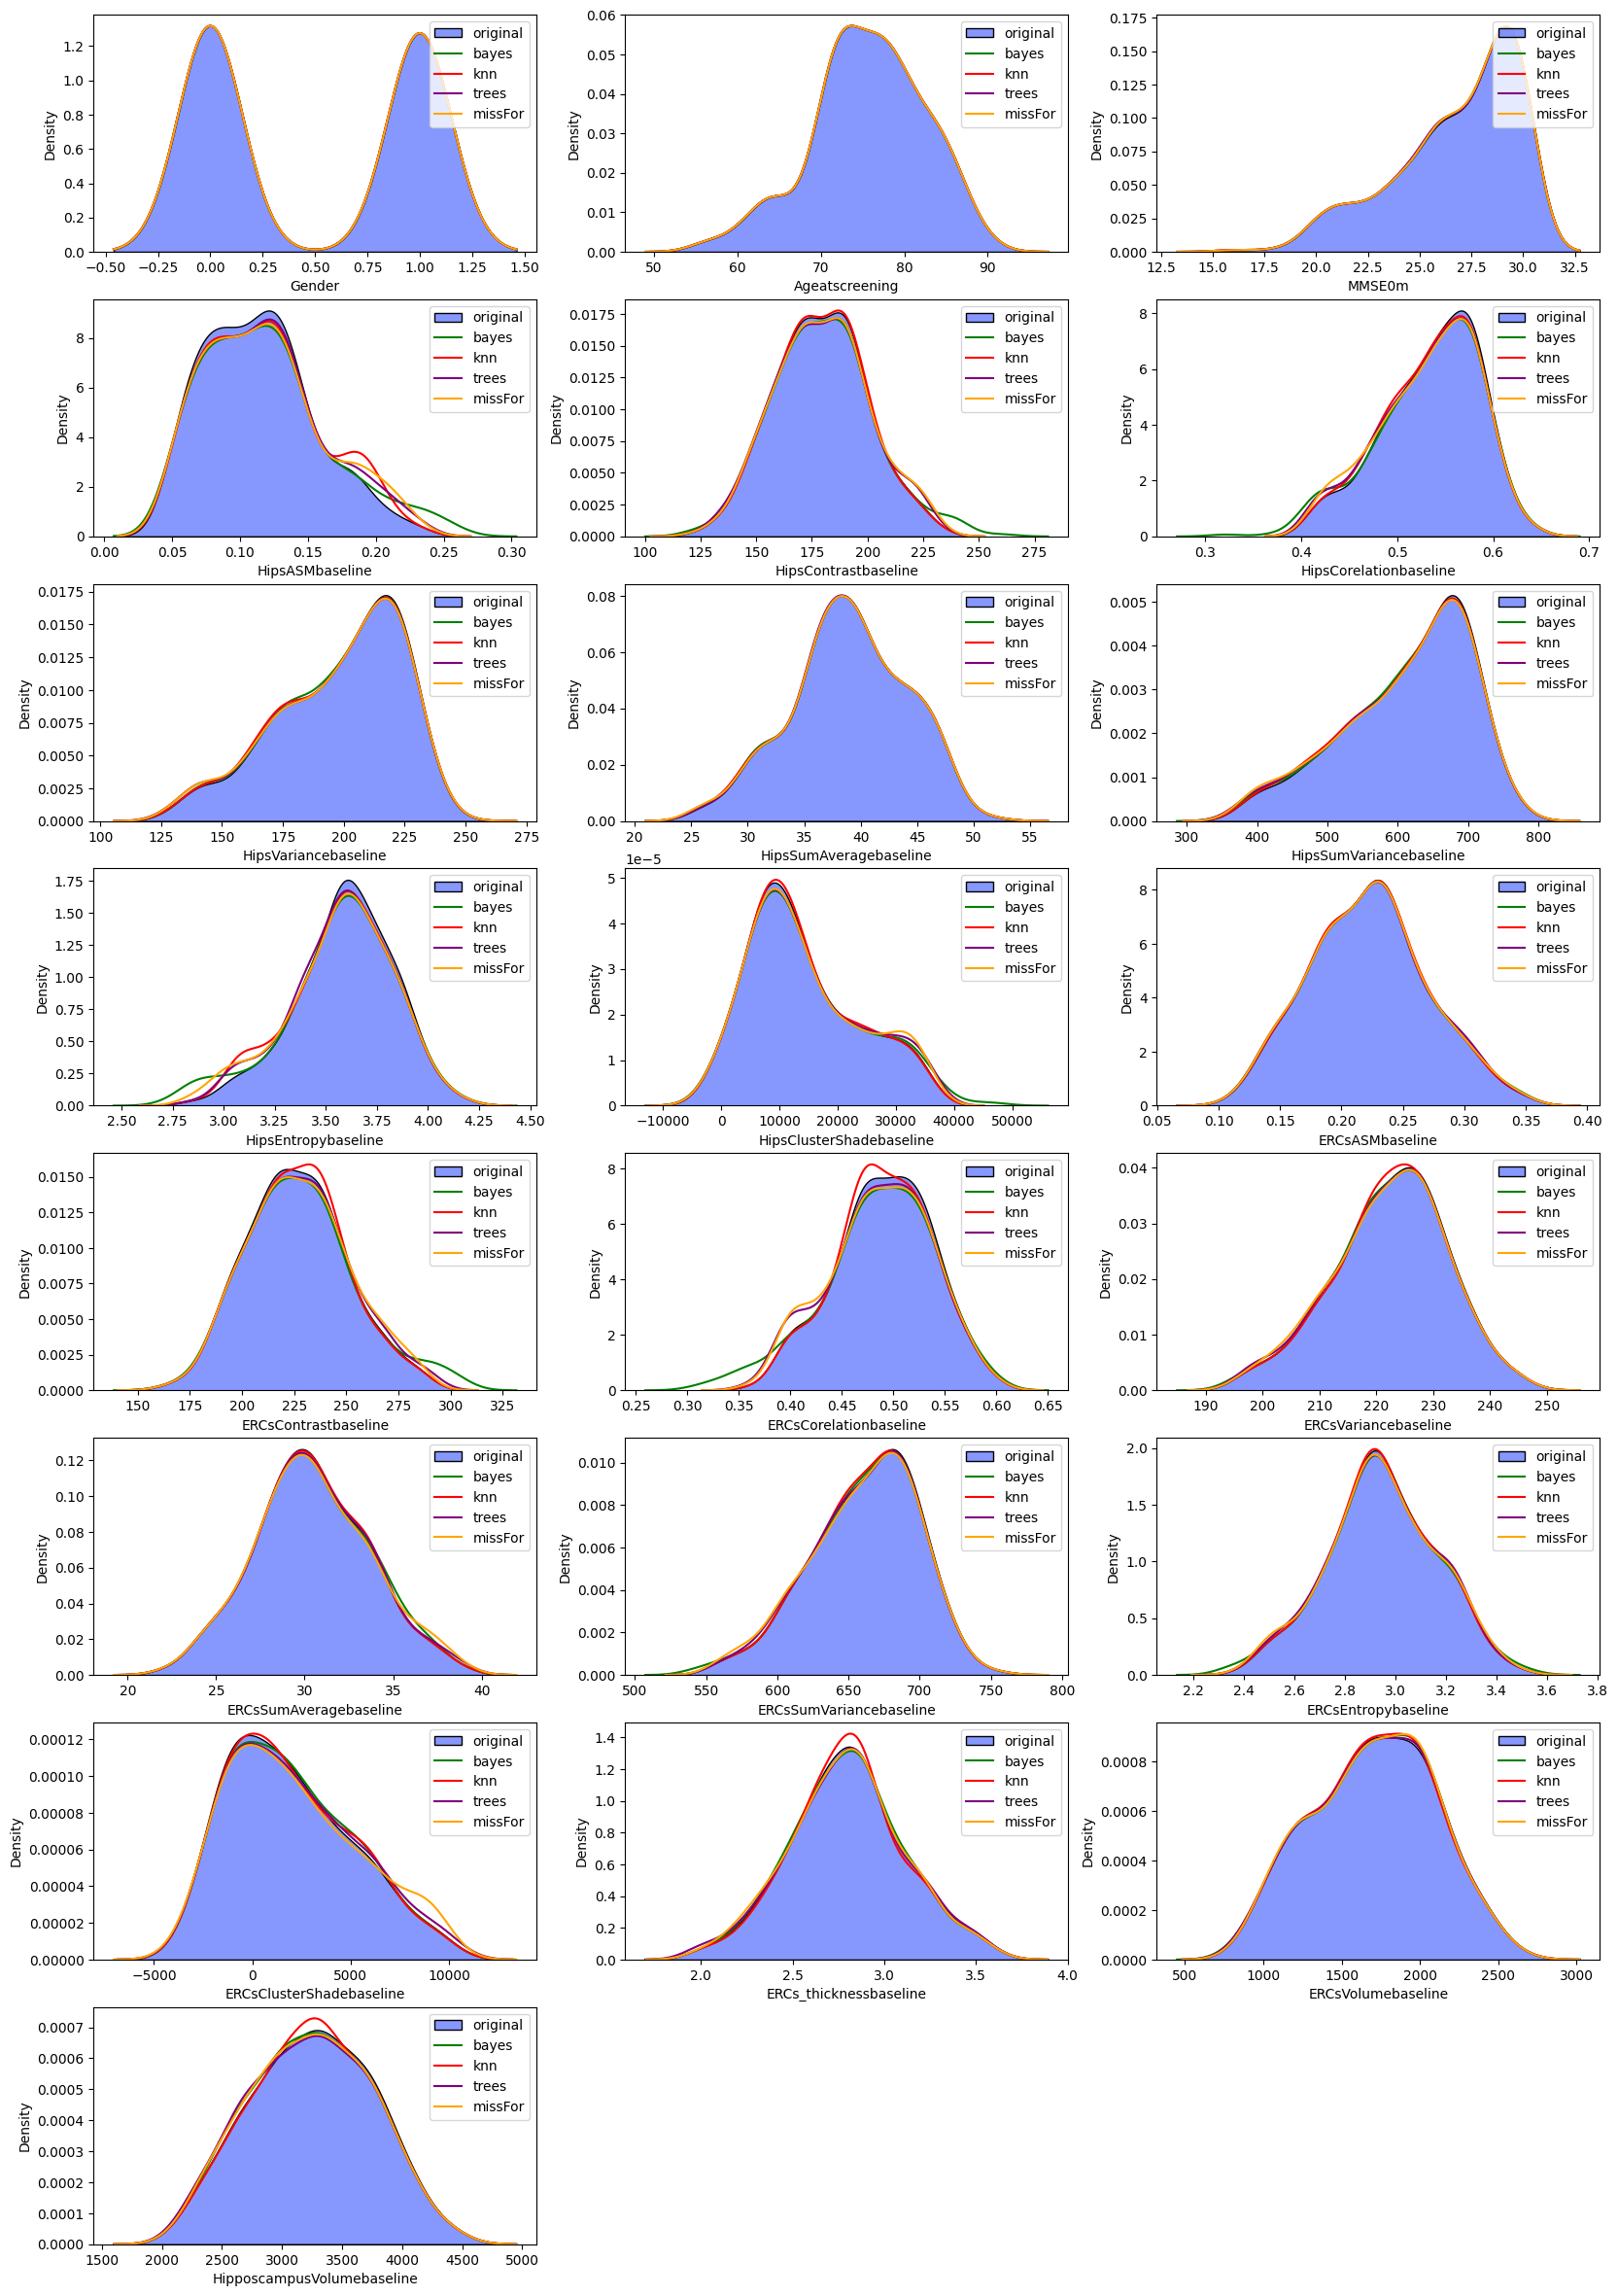

In [19]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_bayes_t[X_train_bayes_t.columns[i]], color= "green")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_knn_t[X_train_knn_t.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_nonLin_t[X_train_nonLin_t.columns[i]], color= "purple")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_missForest_t[X_train_missForest_t.columns[i]], color= "orange")
    
    labels = ['original', 'bayes', 'knn', 'trees', 'missFor']
    plt.legend(labels, loc='upper right')

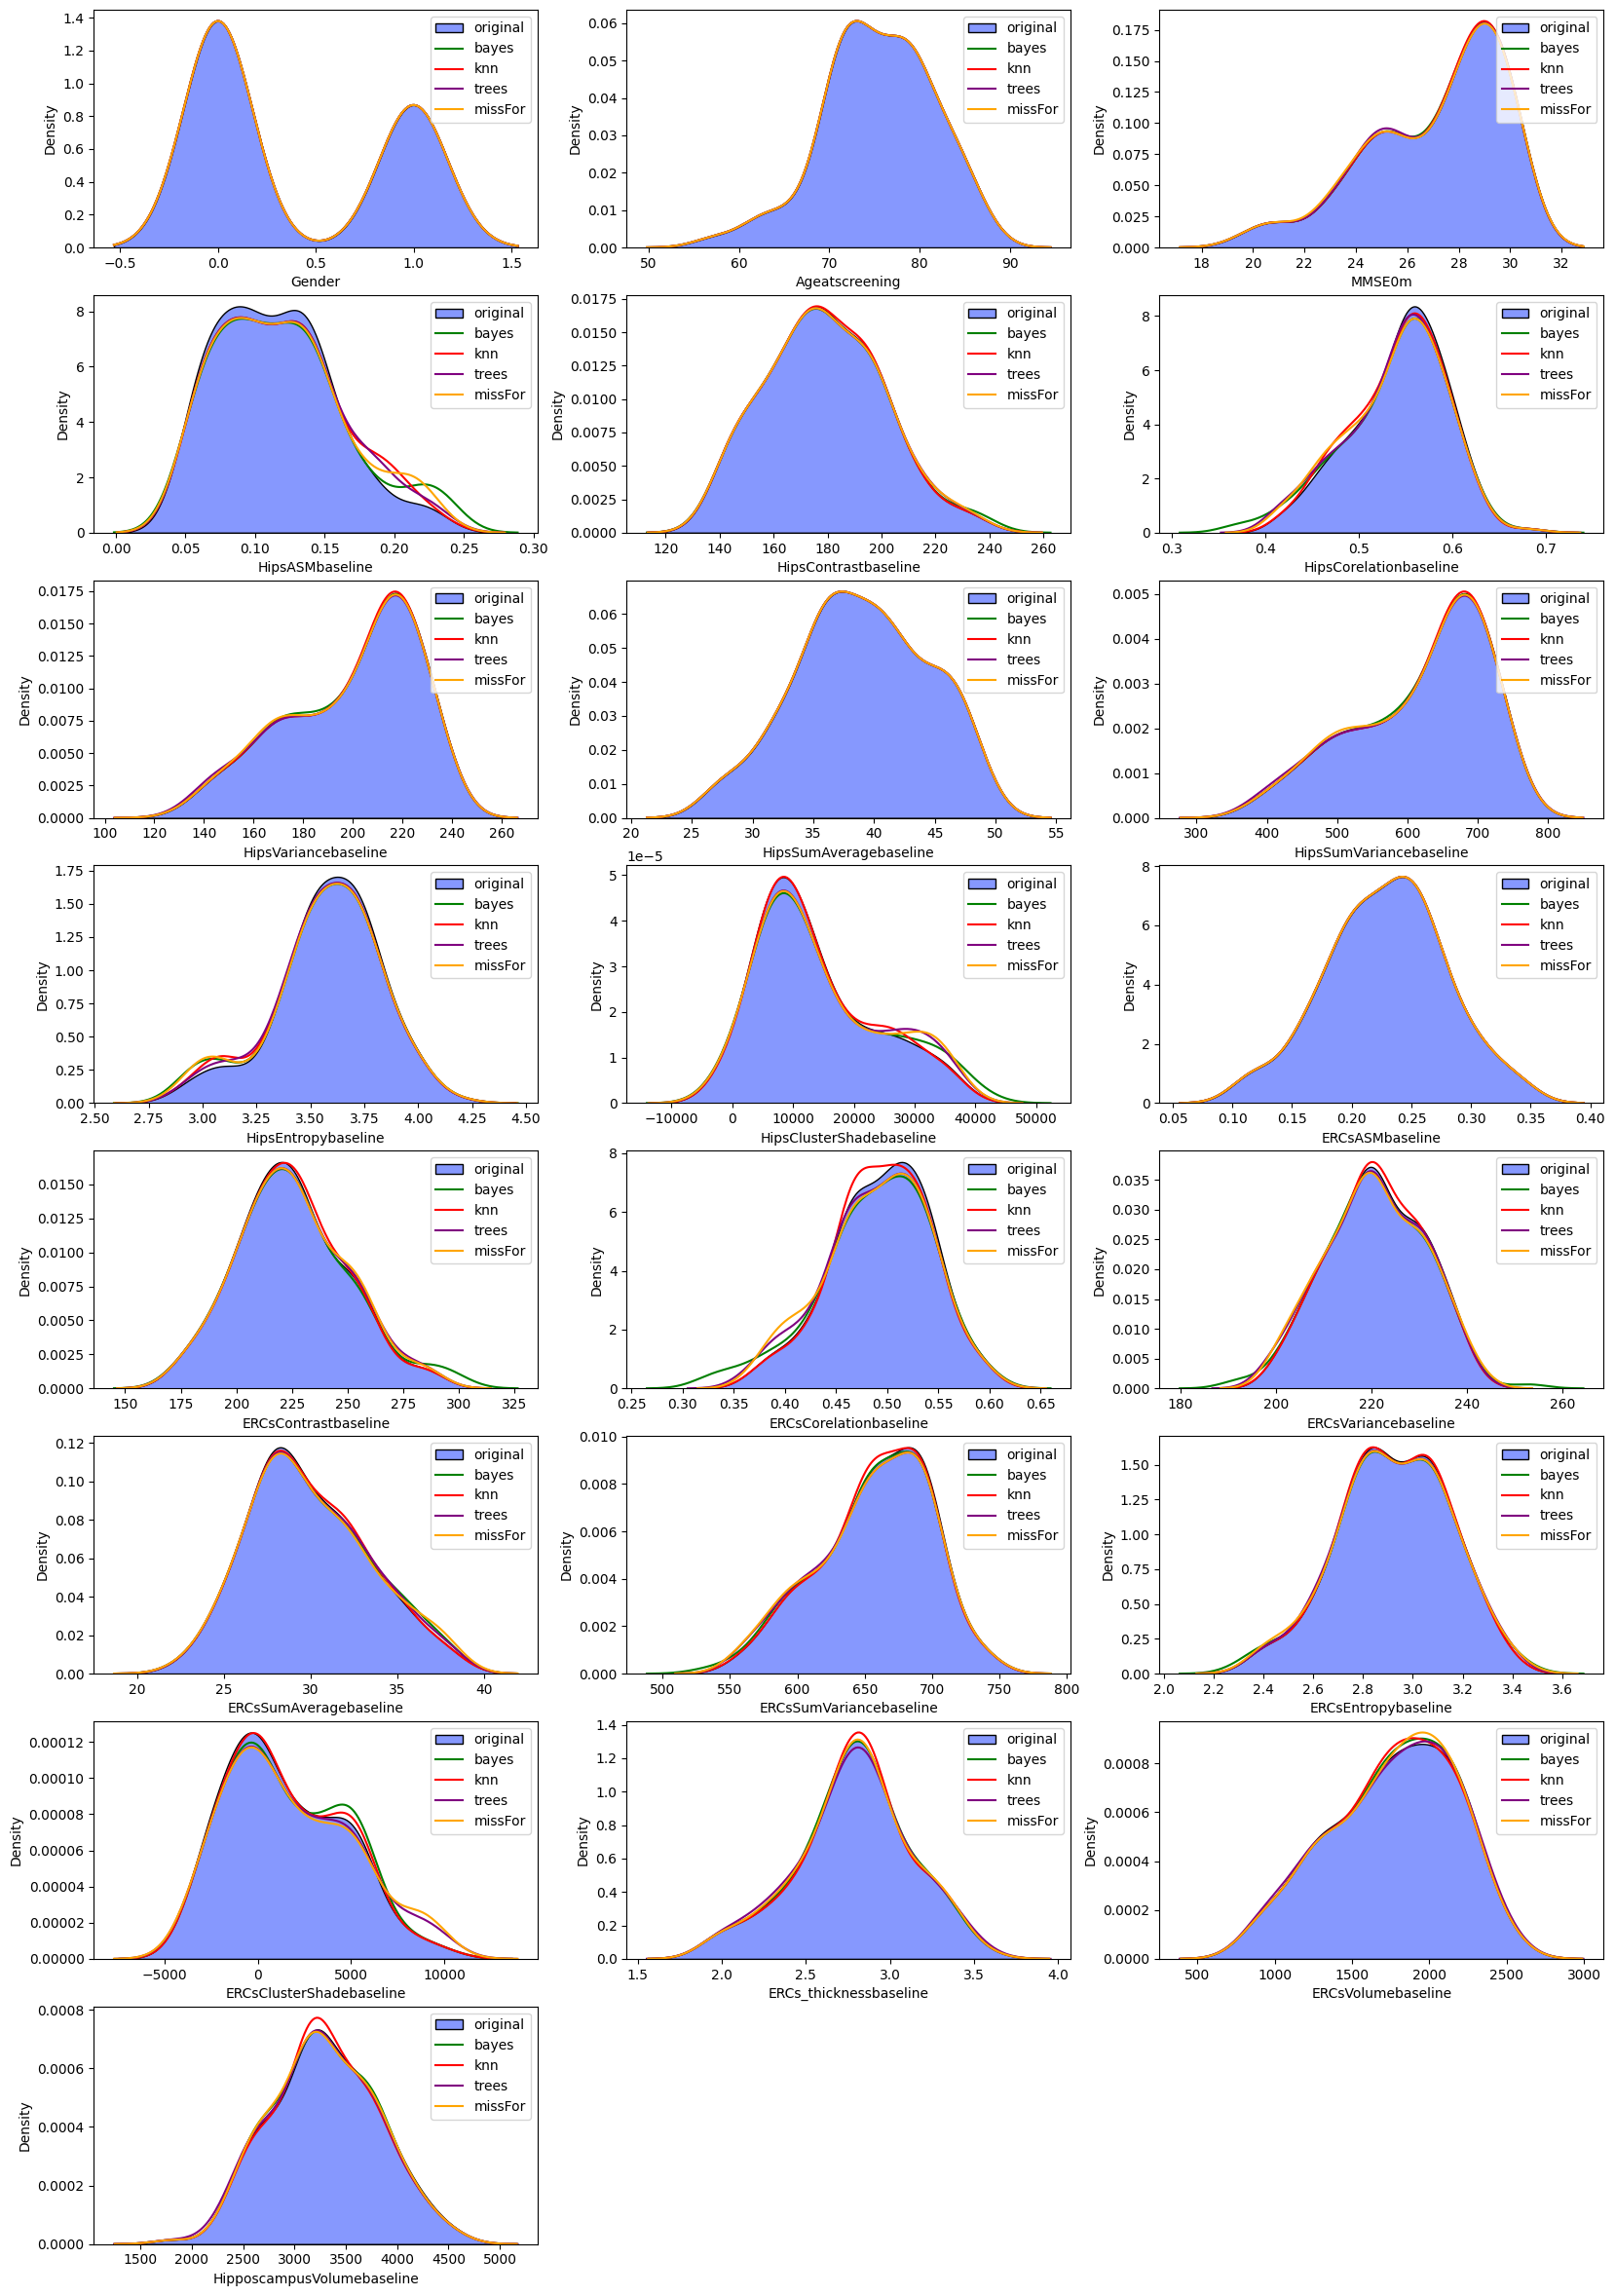

In [20]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_bayes_t[X_test_bayes_t.columns[i]], color= "green")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_knn_t[X_test_knn_t.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_nonLin_t[X_test_nonLin_t.columns[i]], color= "purple")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_missForest_t[X_test_missForest_t.columns[i]], color= "orange")
    
    labels = ['original', 'bayes', 'knn', 'trees', 'missFor']
    plt.legend(labels, loc='upper right')


### Q-Q Plot for Bayes

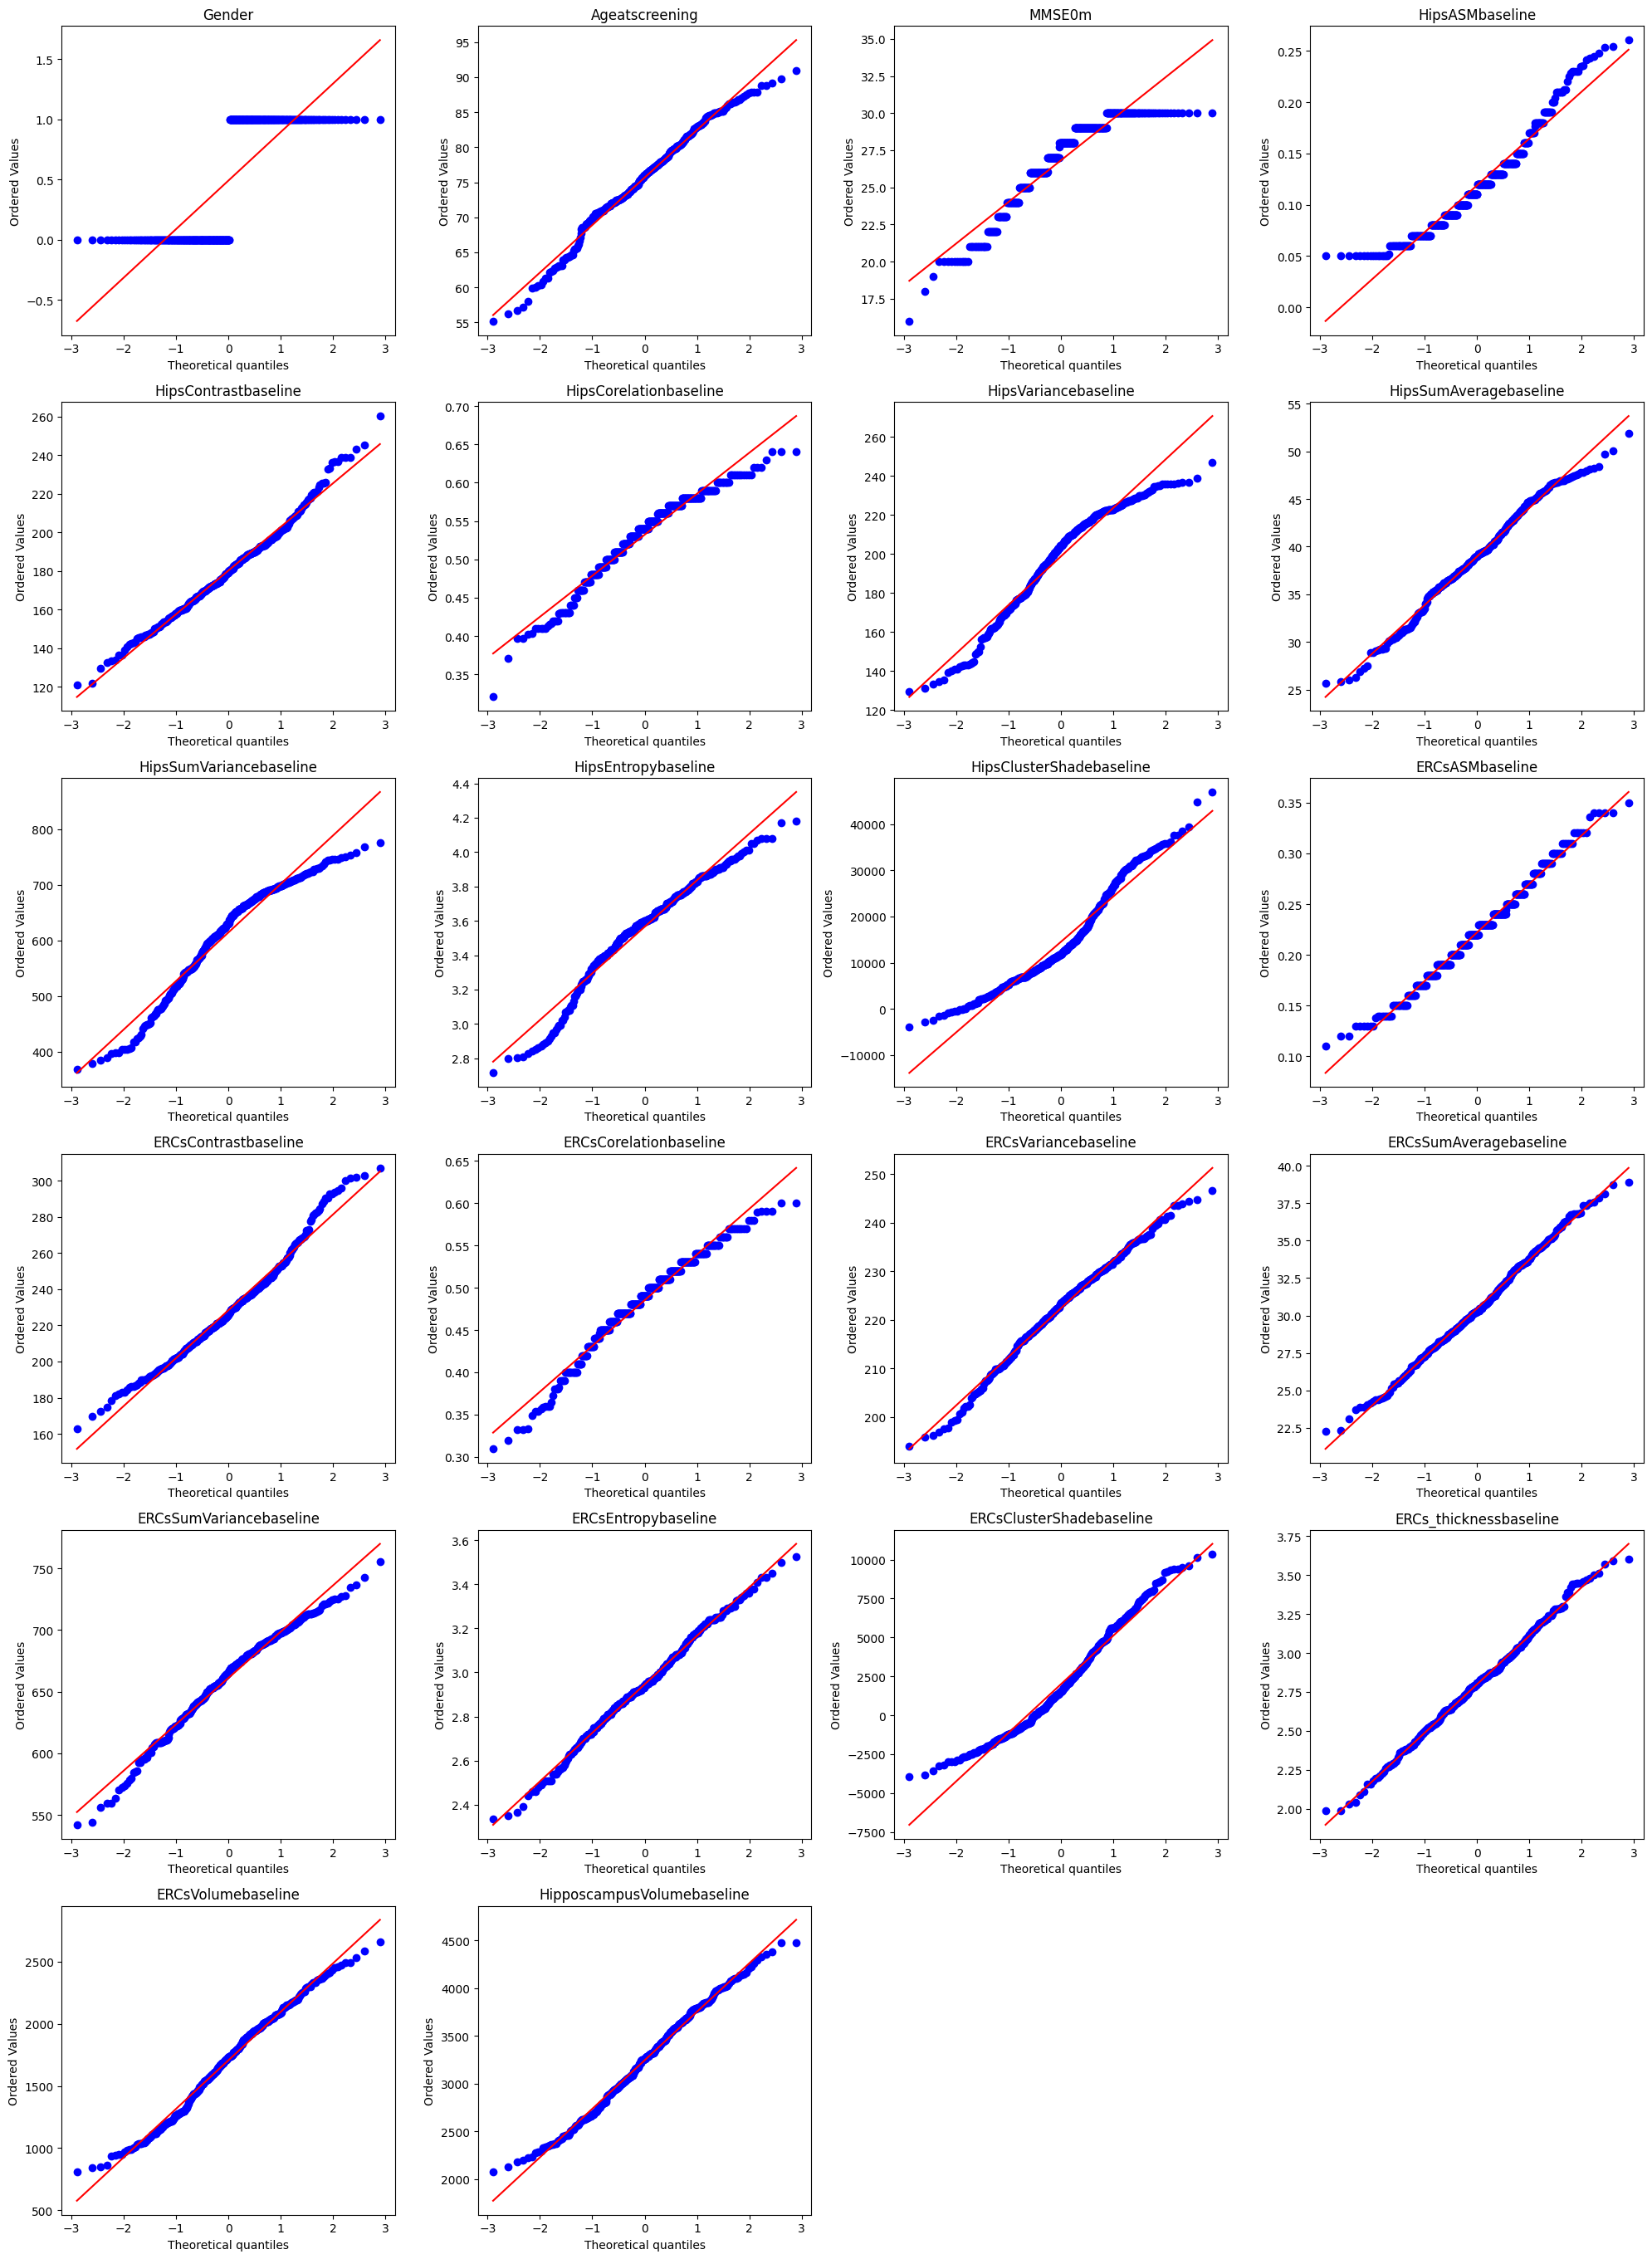

In [21]:
from scipy import stats

# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_train_bayes_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_train_bayes_t[X_train_bayes_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_train_bayes_t.columns[i])

plt.tight_layout()

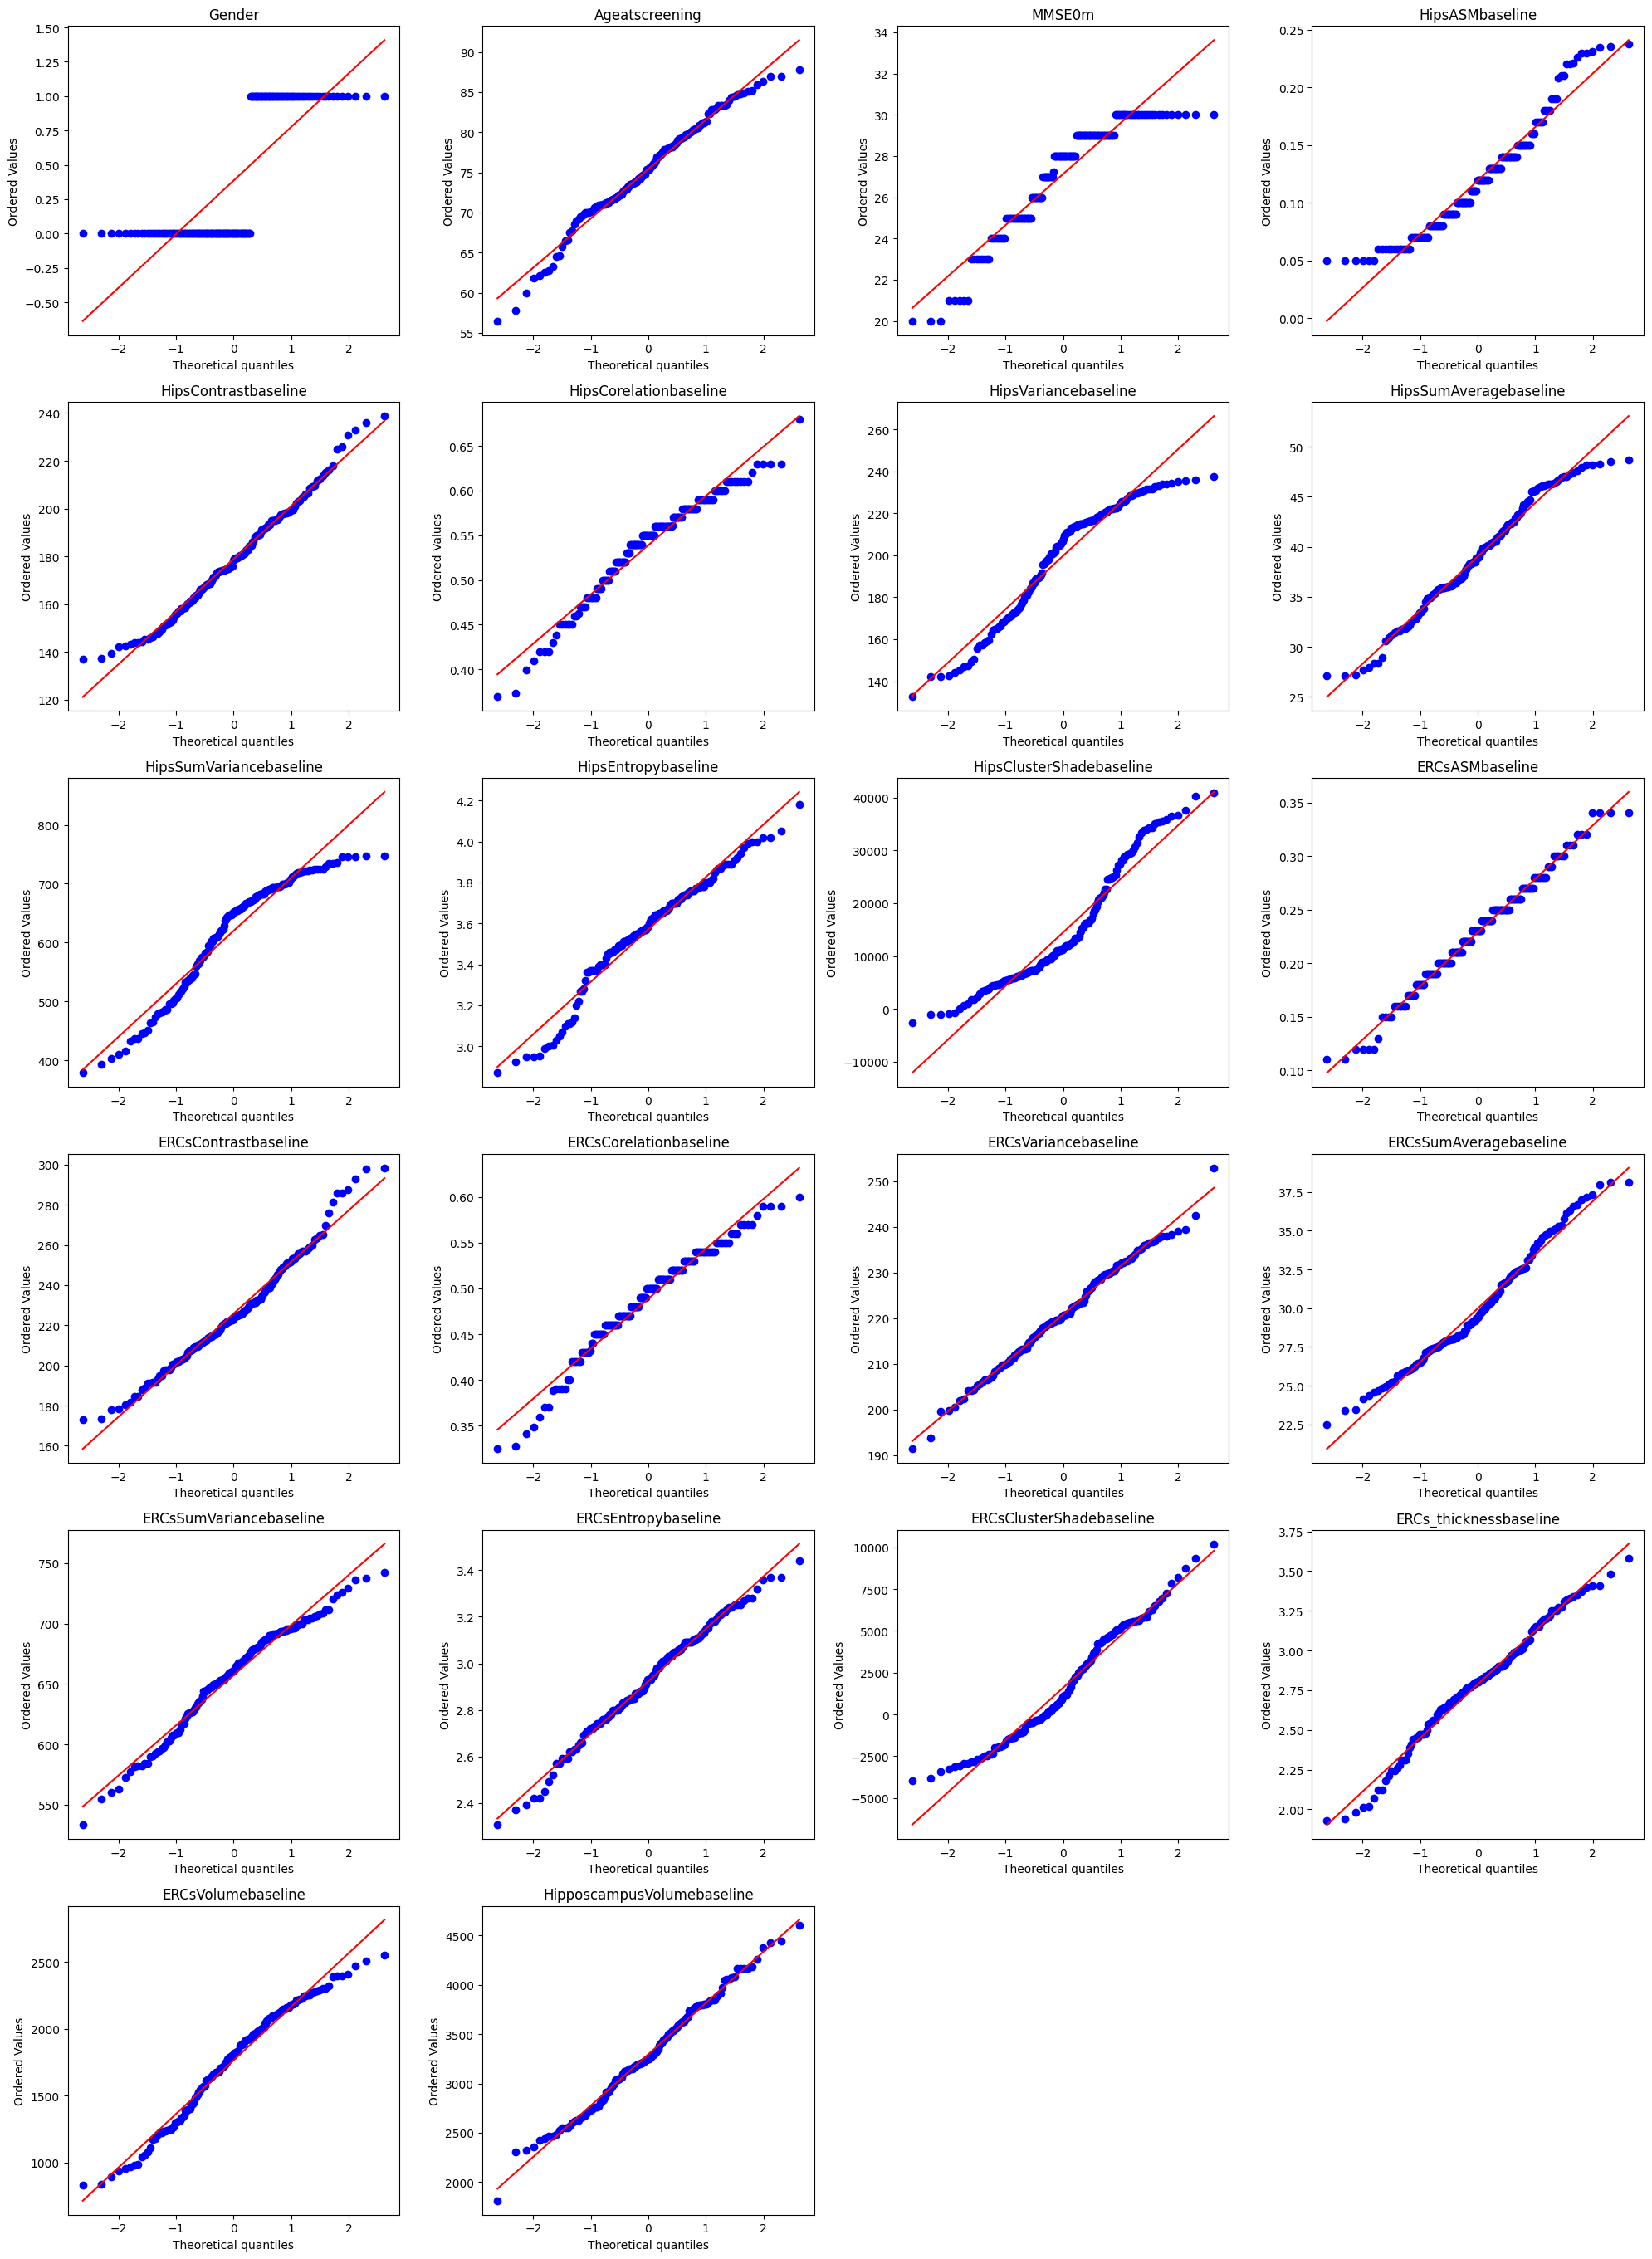

In [22]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_test_bayes_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_test_bayes_t[X_test_bayes_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_test_bayes_t.columns[i])

plt.tight_layout()

### Q-Q Plot for KNNReg

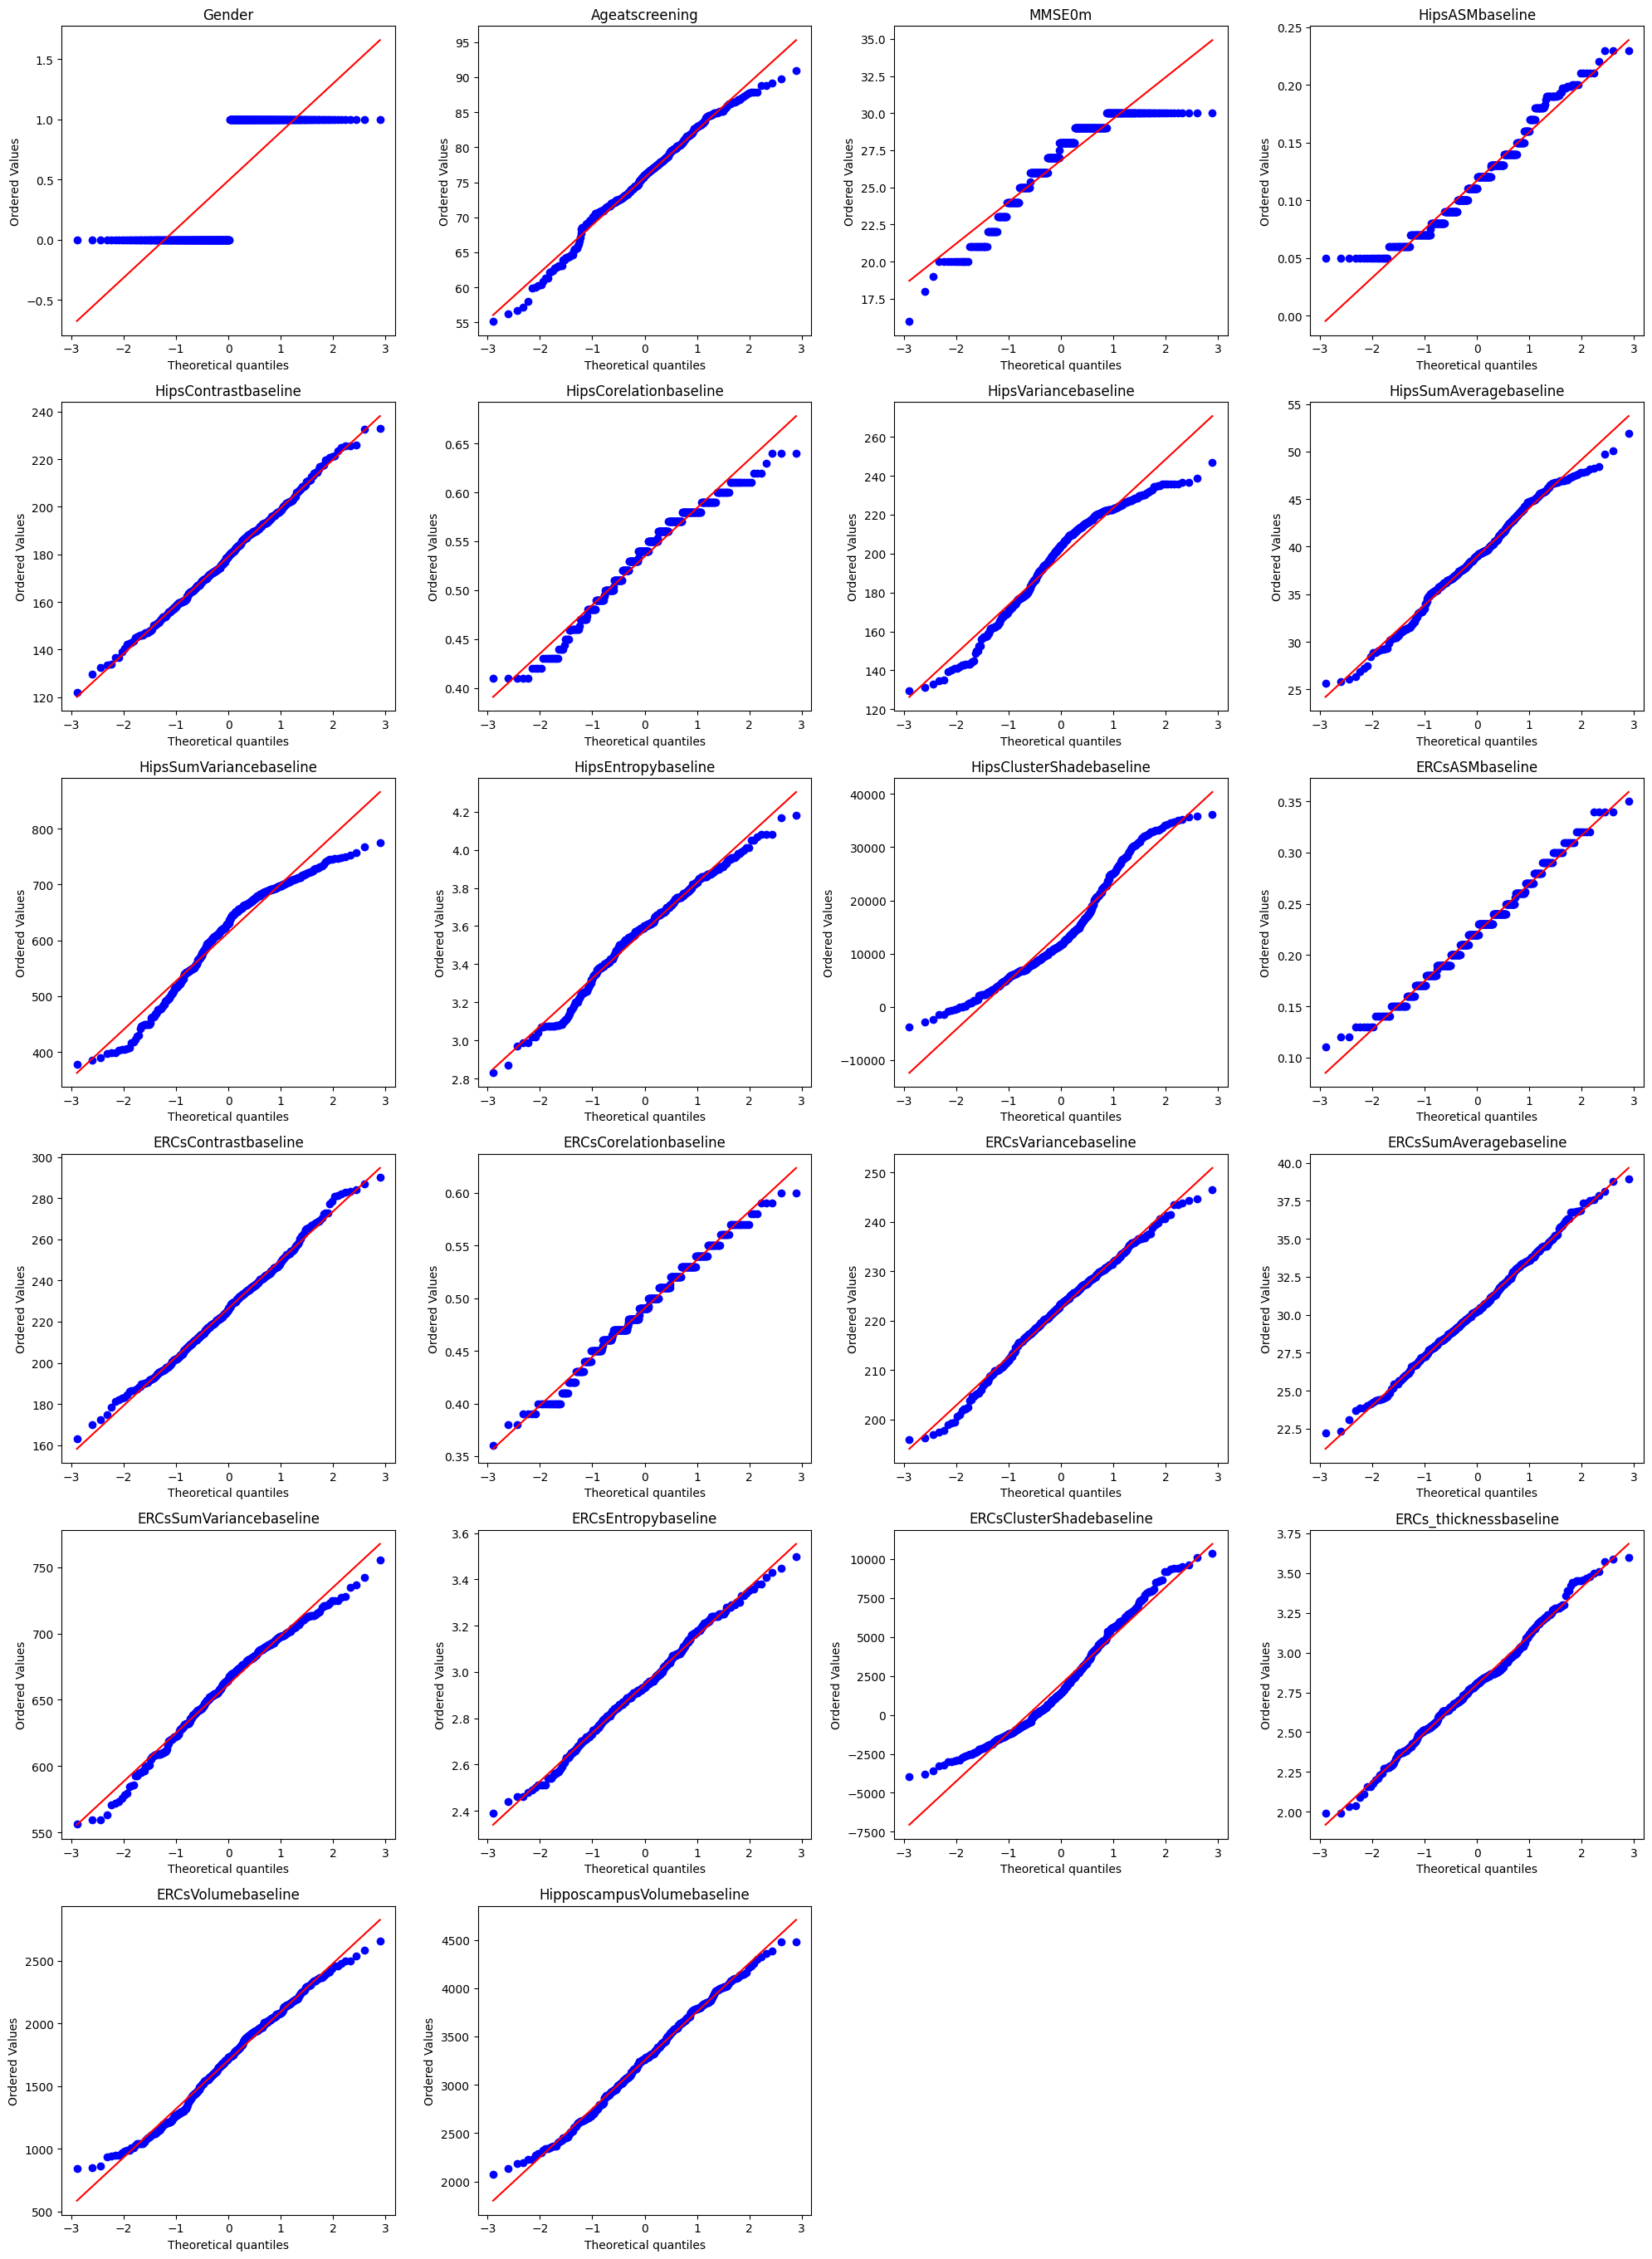

In [23]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_train_knn_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_train_knn_t[X_train_knn_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_train_knn_t.columns[i])

plt.tight_layout()

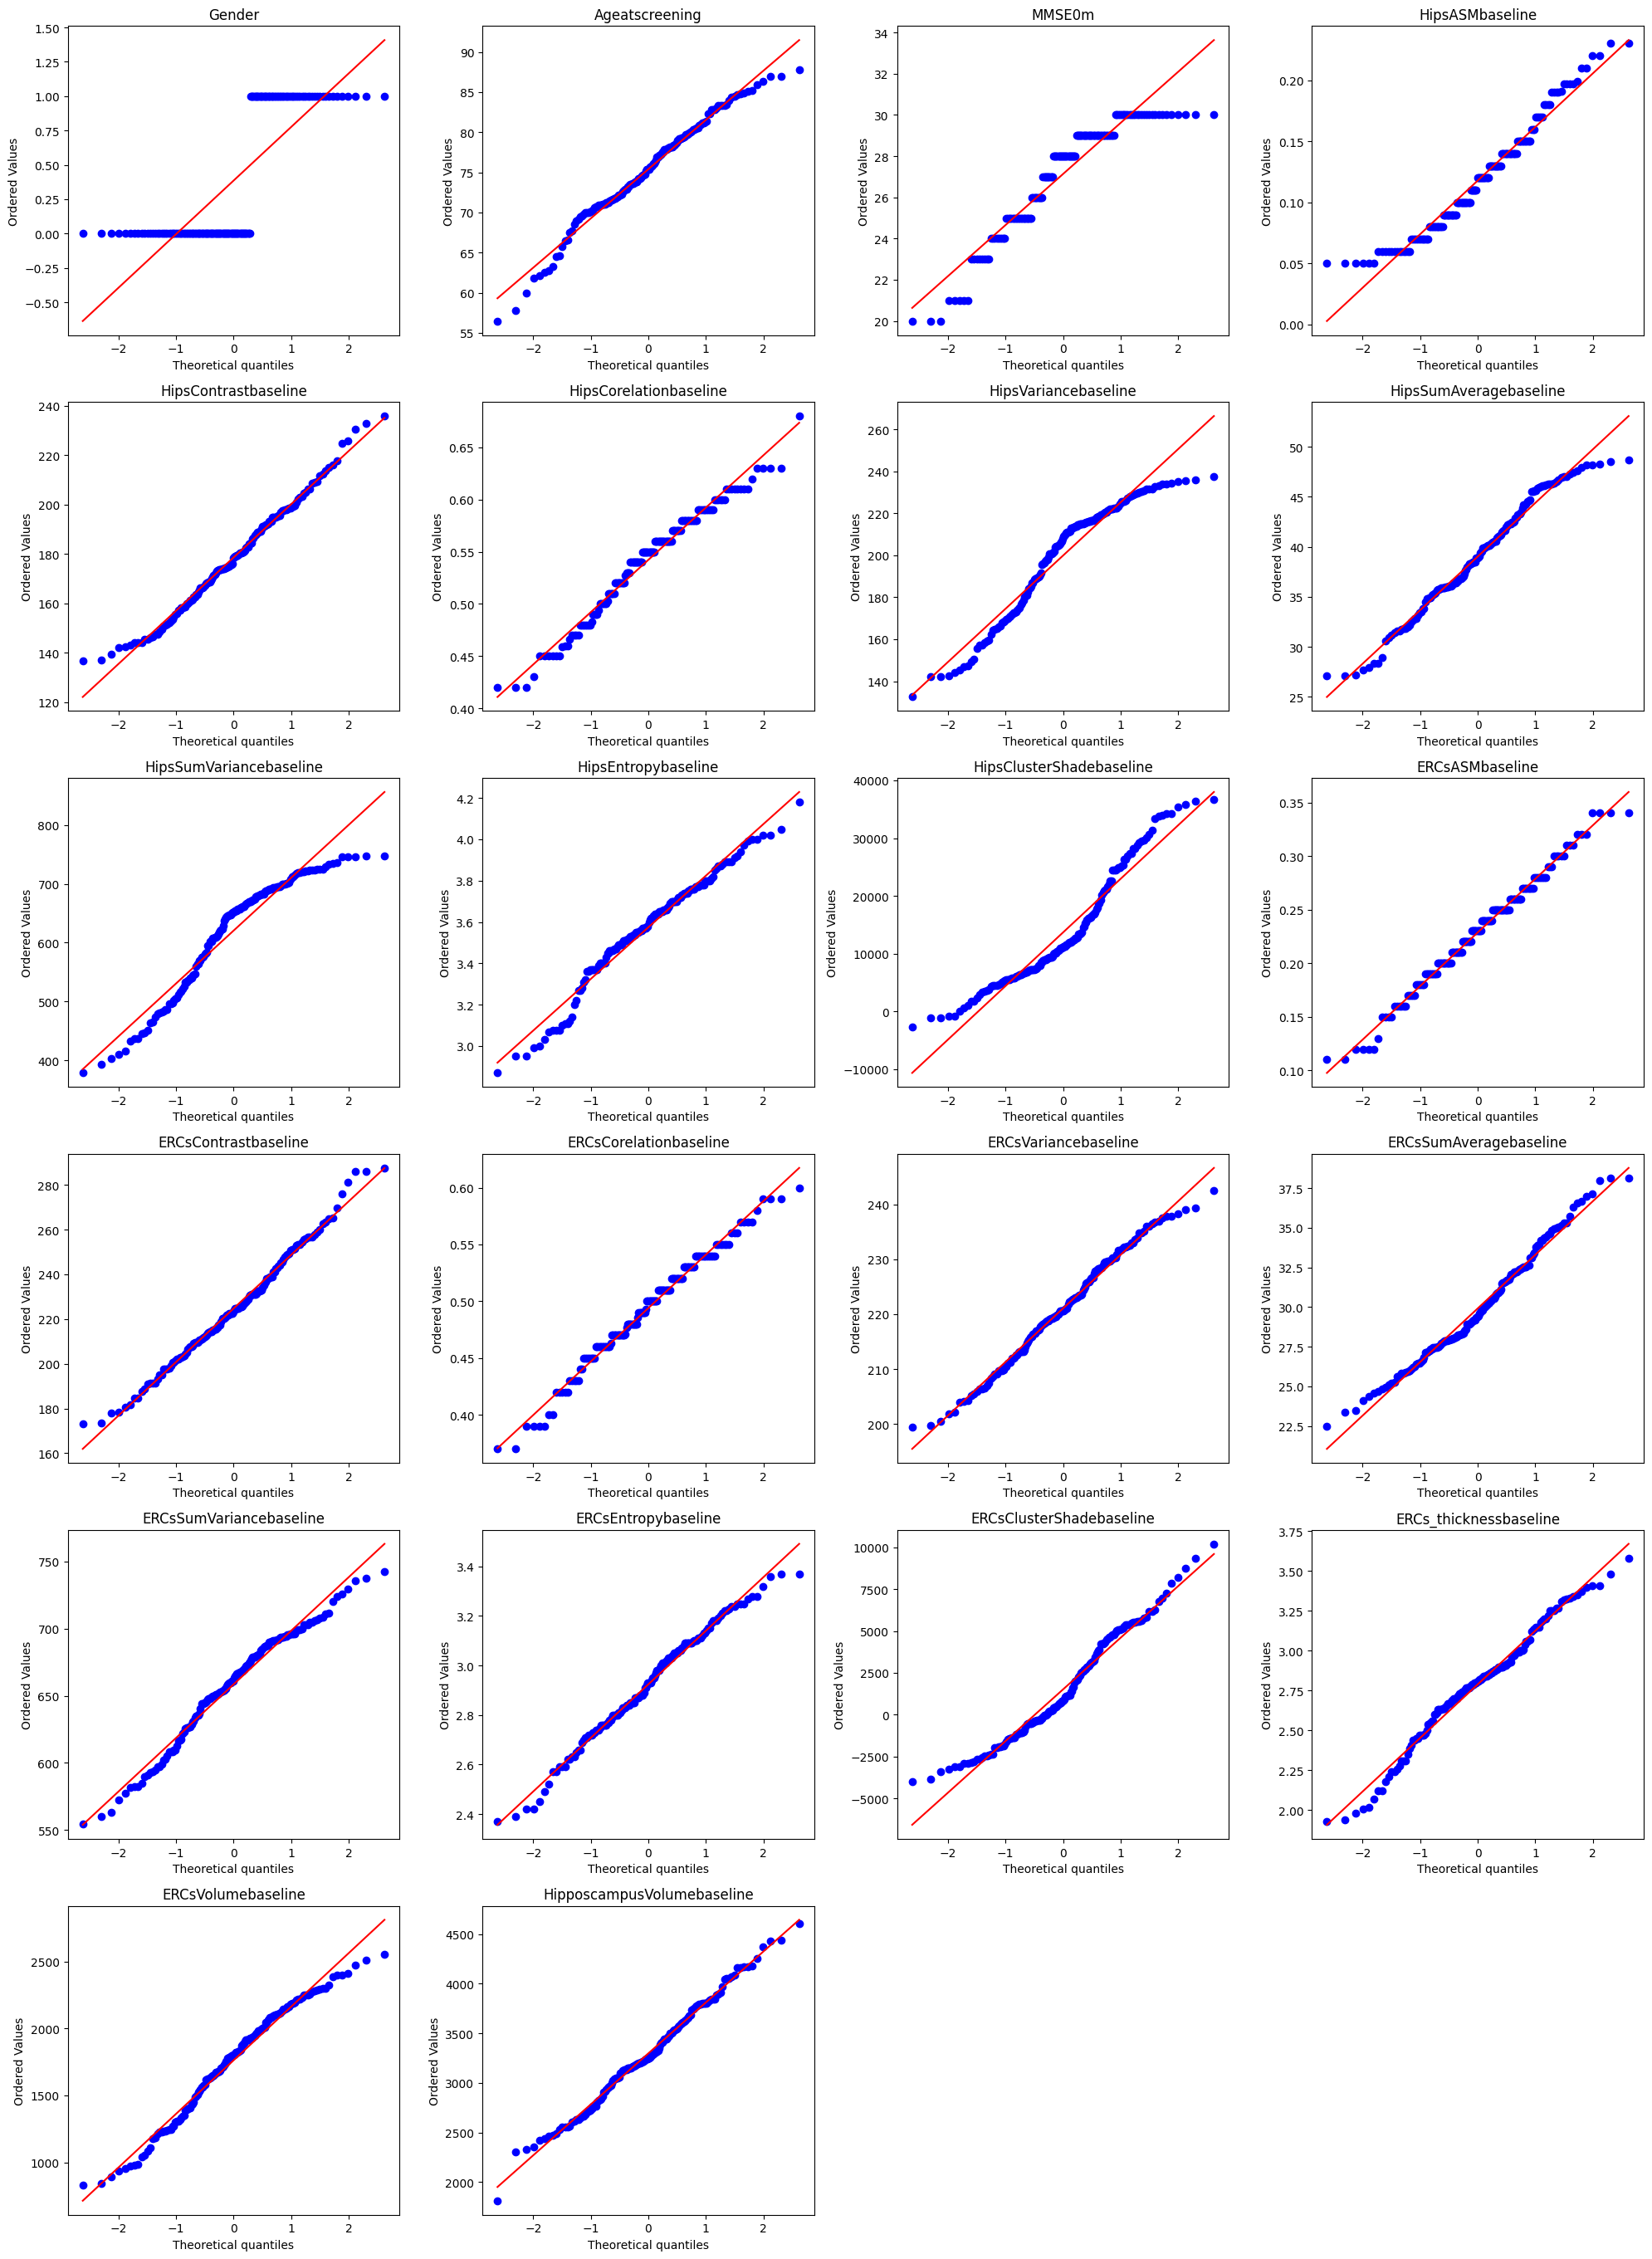

In [24]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_test_knn_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_test_knn_t[X_test_knn_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_test_knn_t.columns[i])

plt.tight_layout()

### Q-Q Plot for nonLin

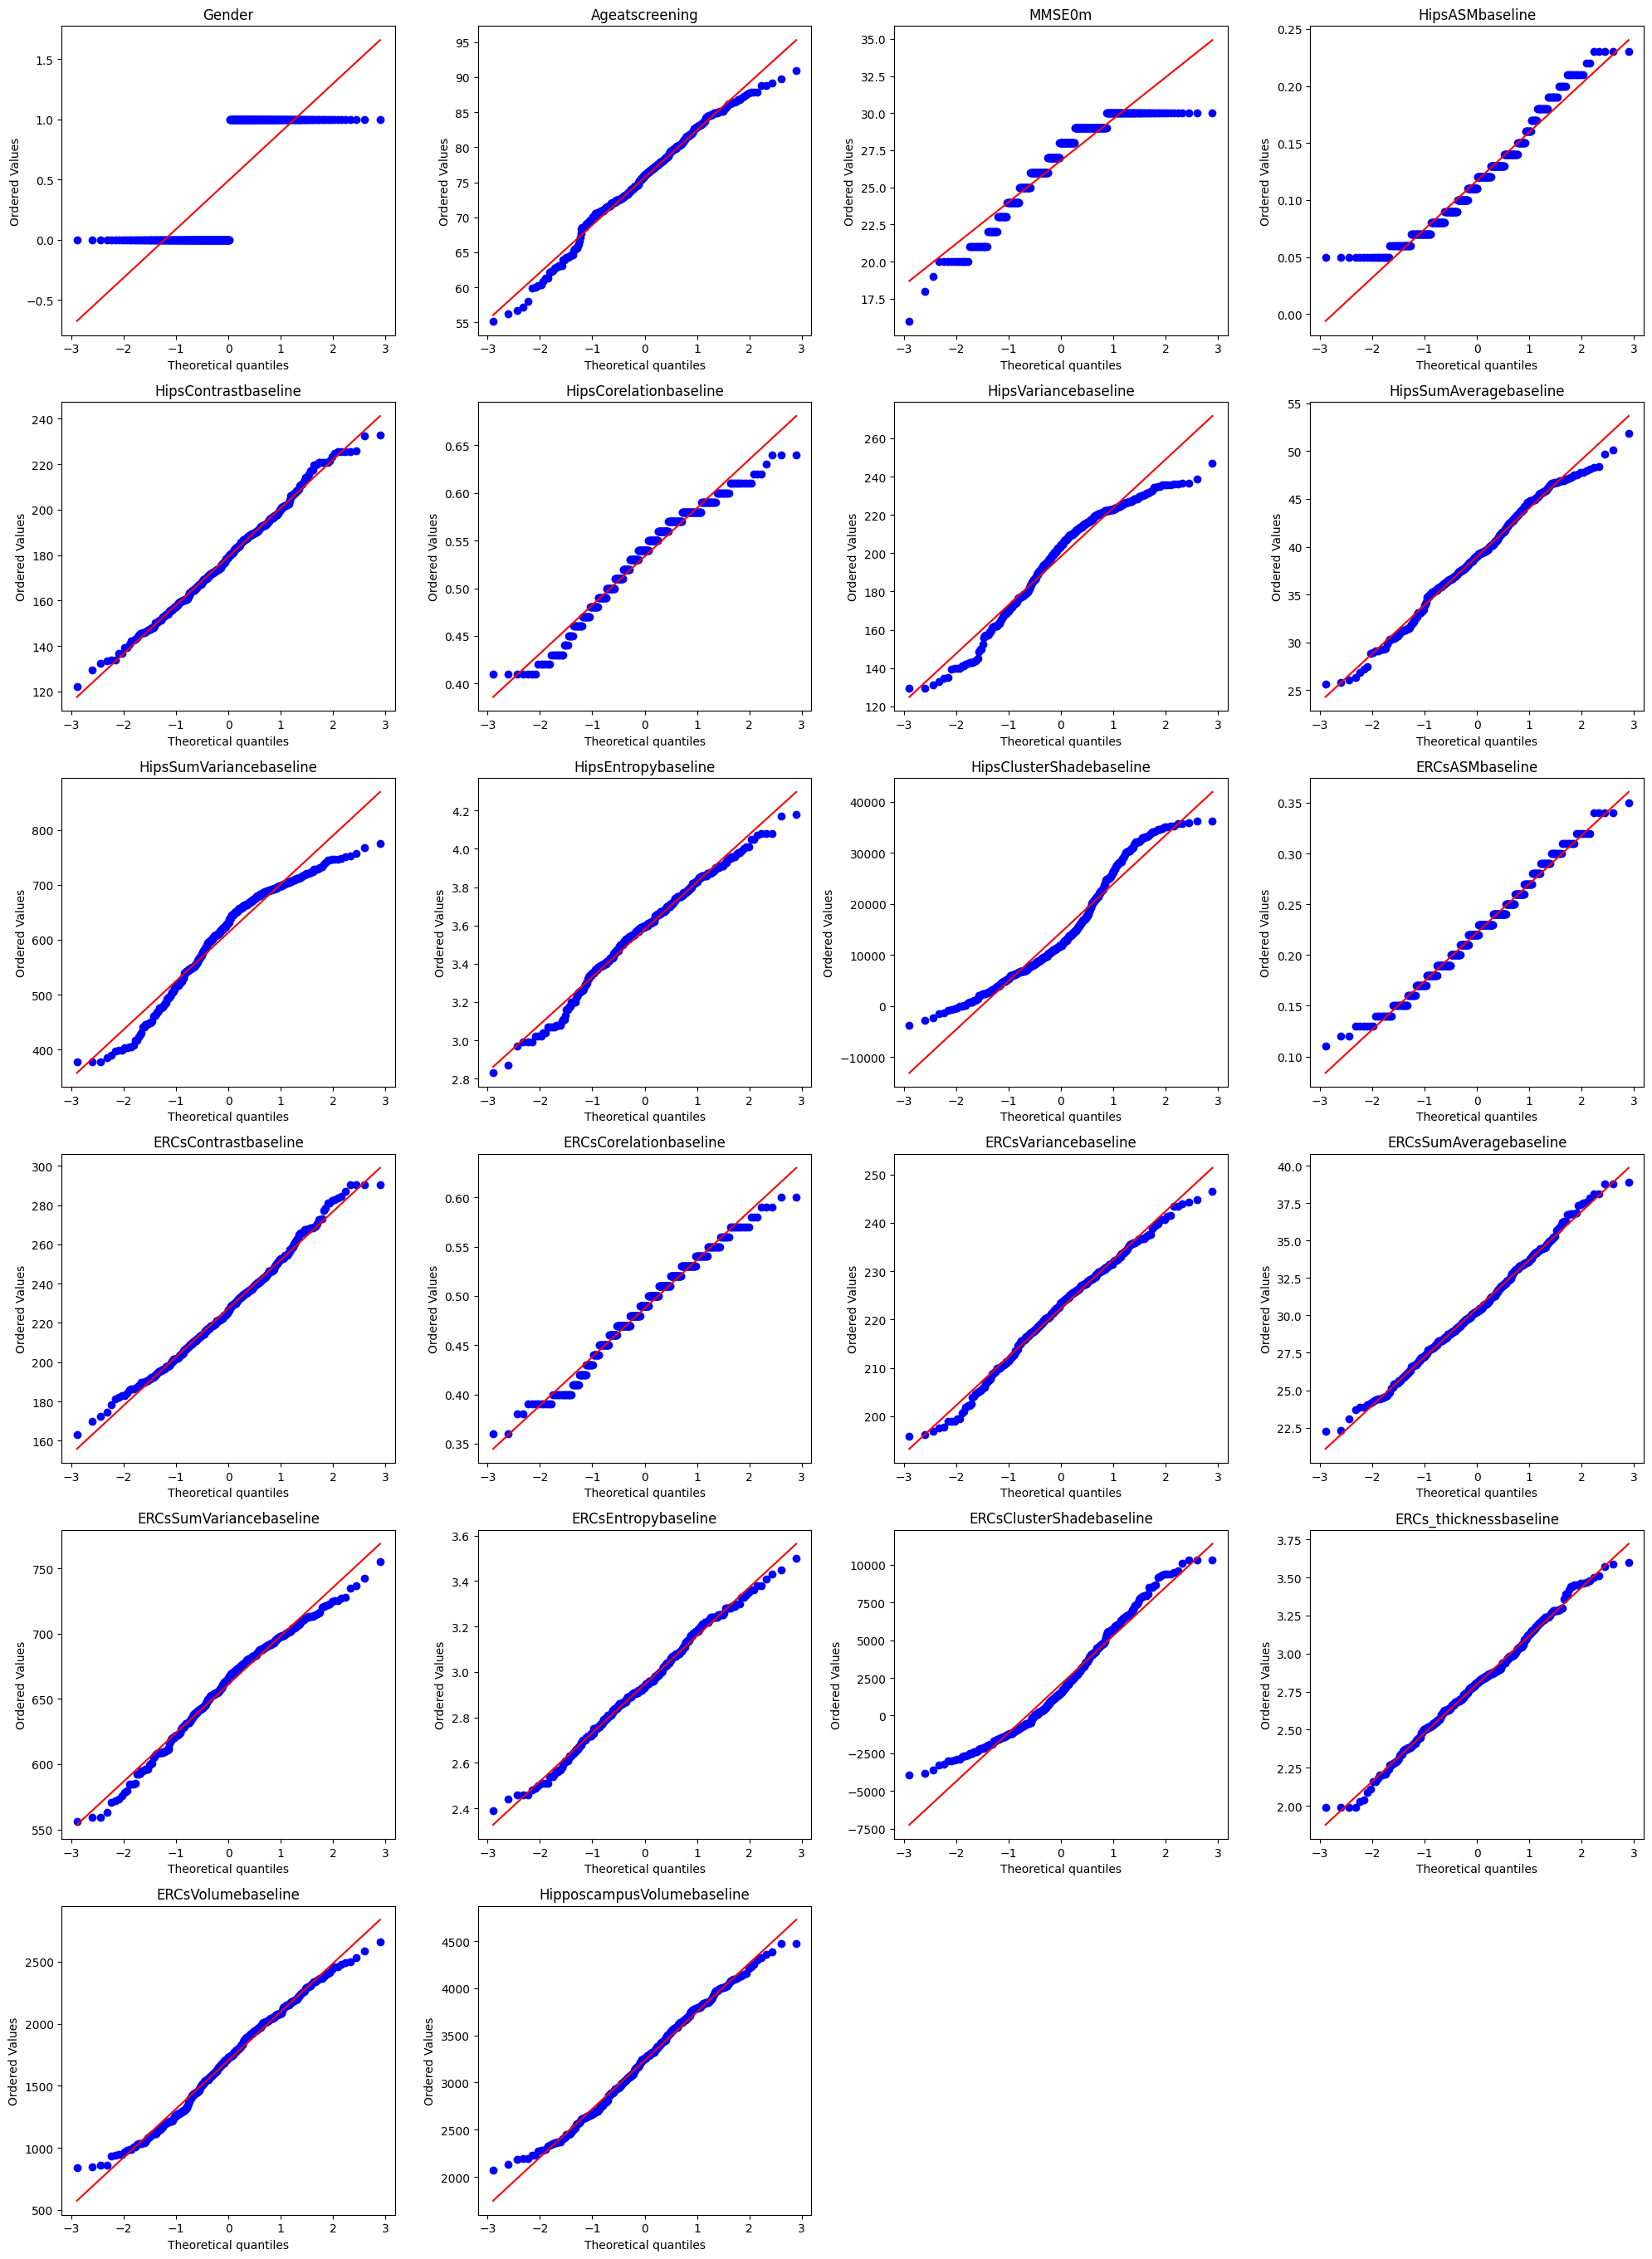

In [25]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_train_nonLin_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_train_nonLin_t[X_train_nonLin_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_train_nonLin_t.columns[i])

plt.tight_layout()

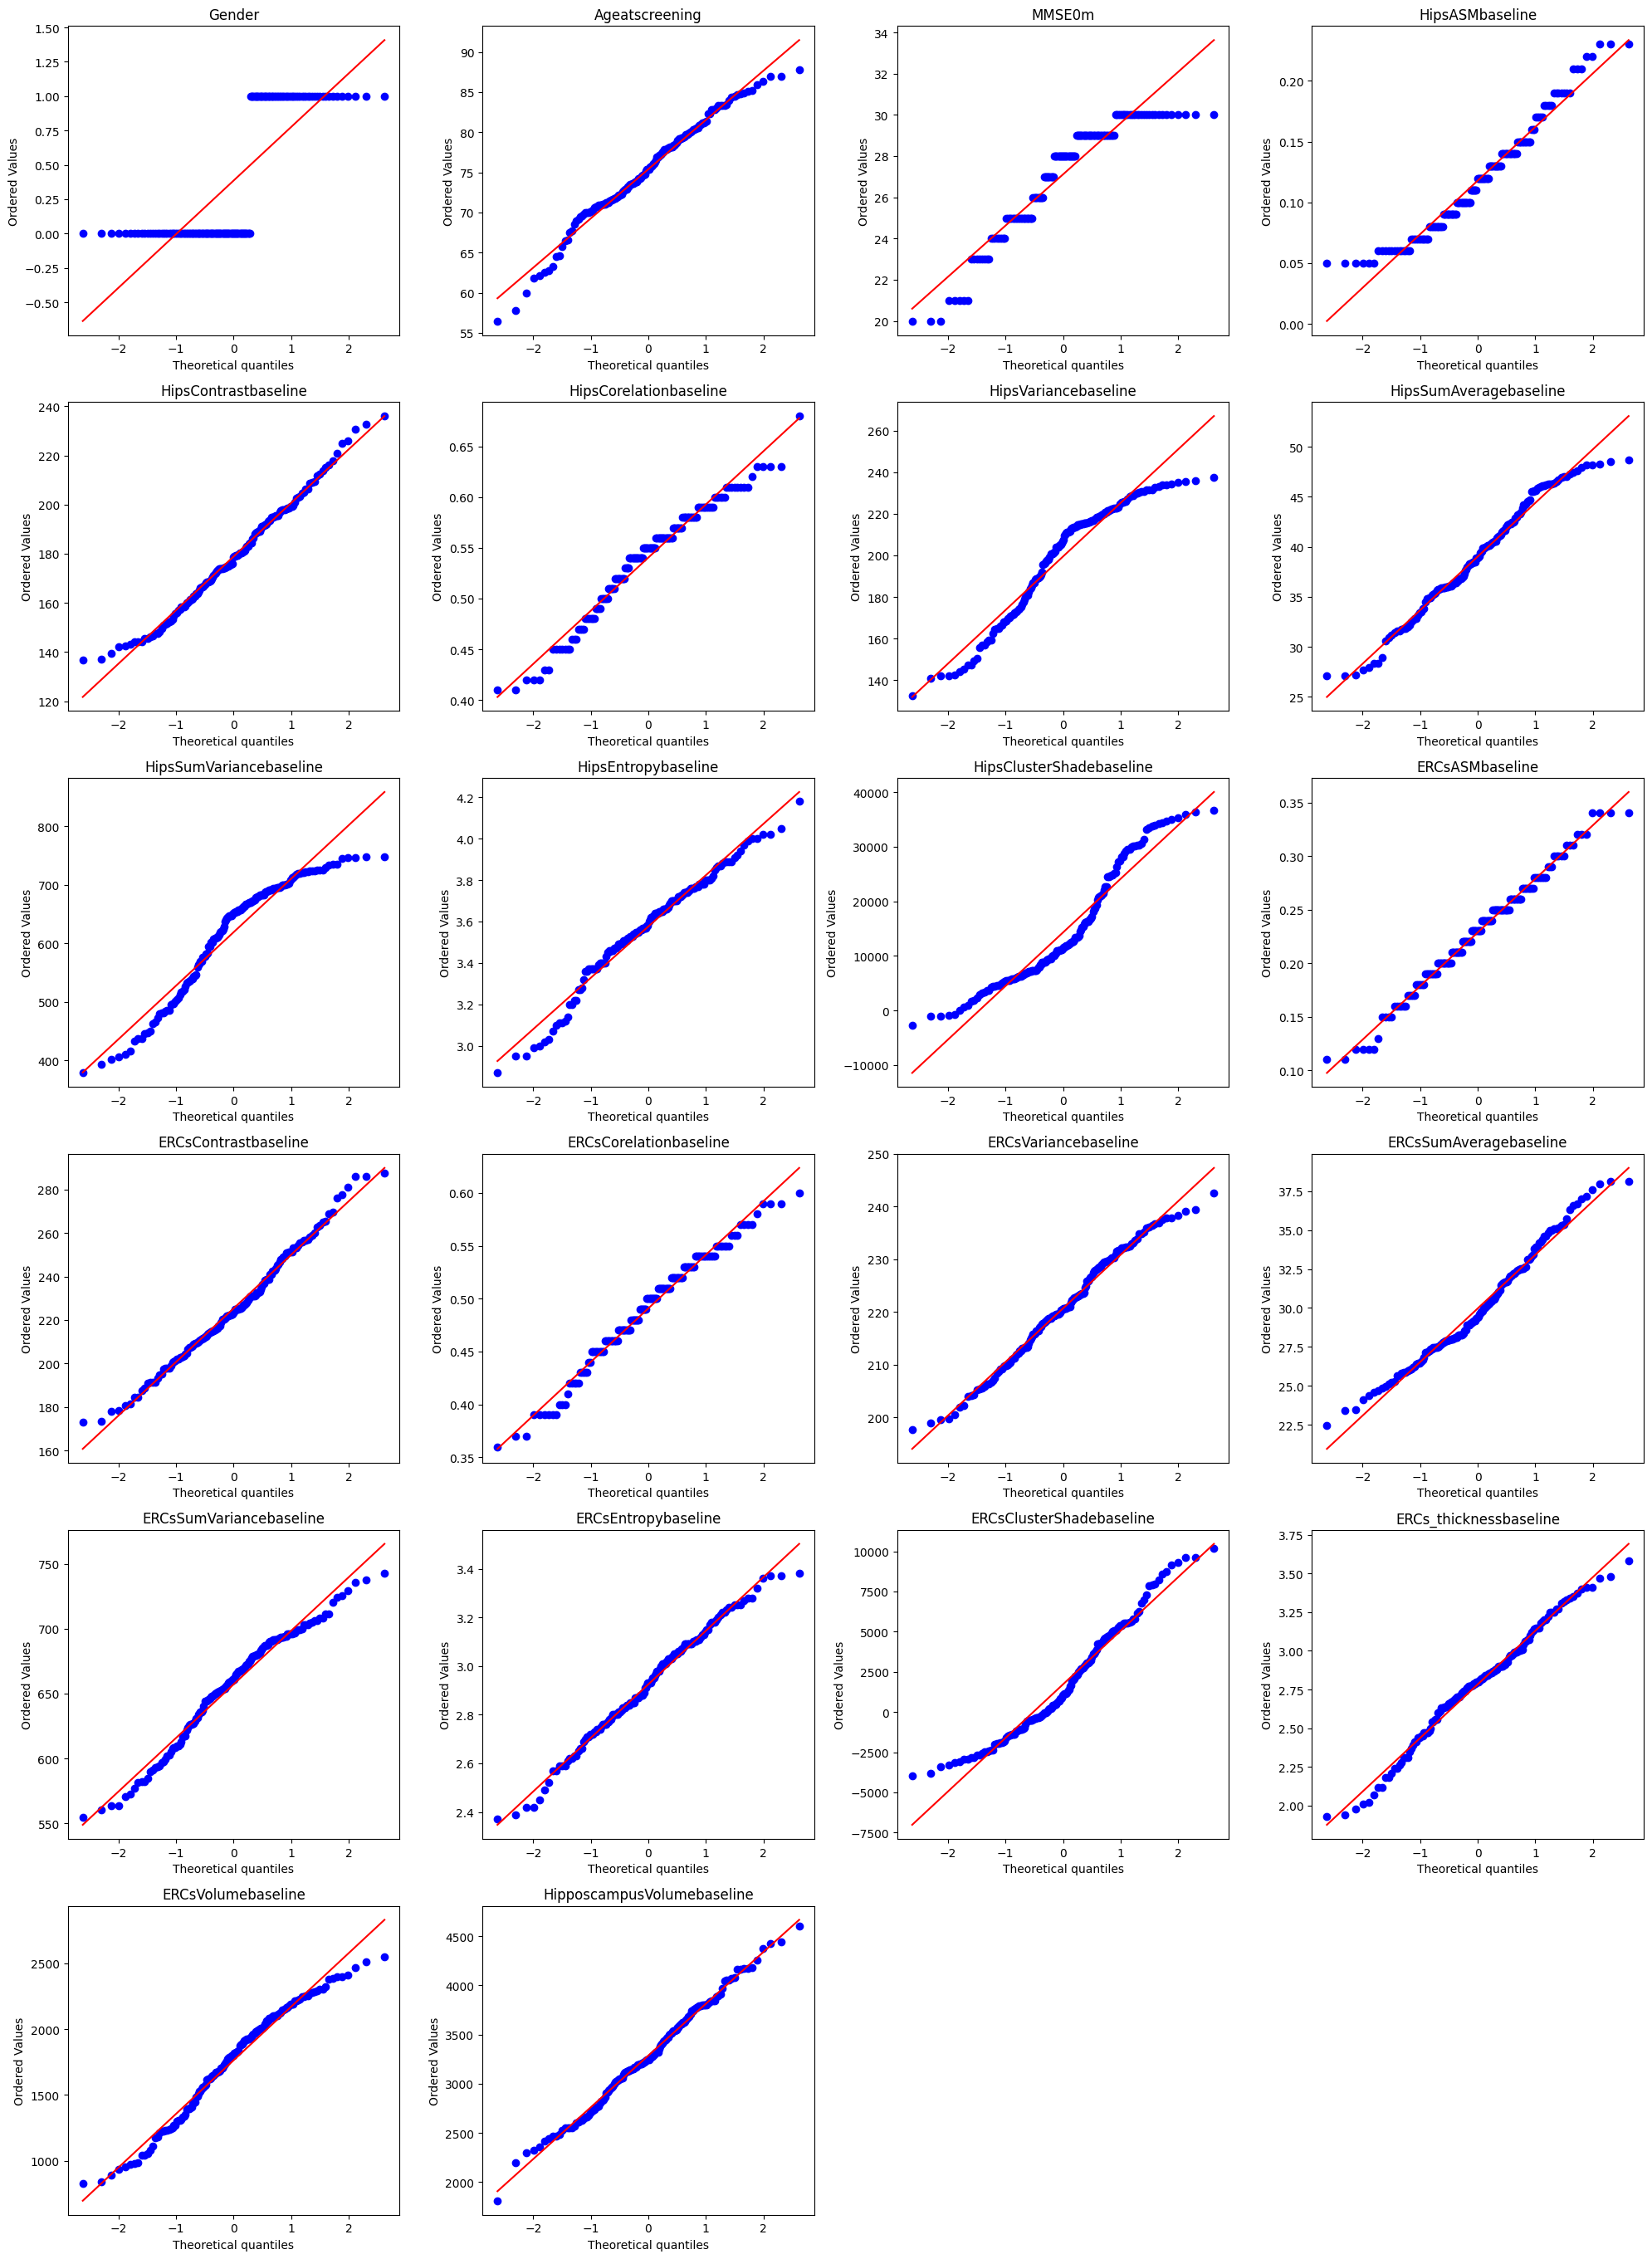

In [26]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_test_nonLin_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_test_nonLin_t[X_test_nonLin_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_test_nonLin_t.columns[i])

plt.tight_layout()

### Q-Q Plot for missForest

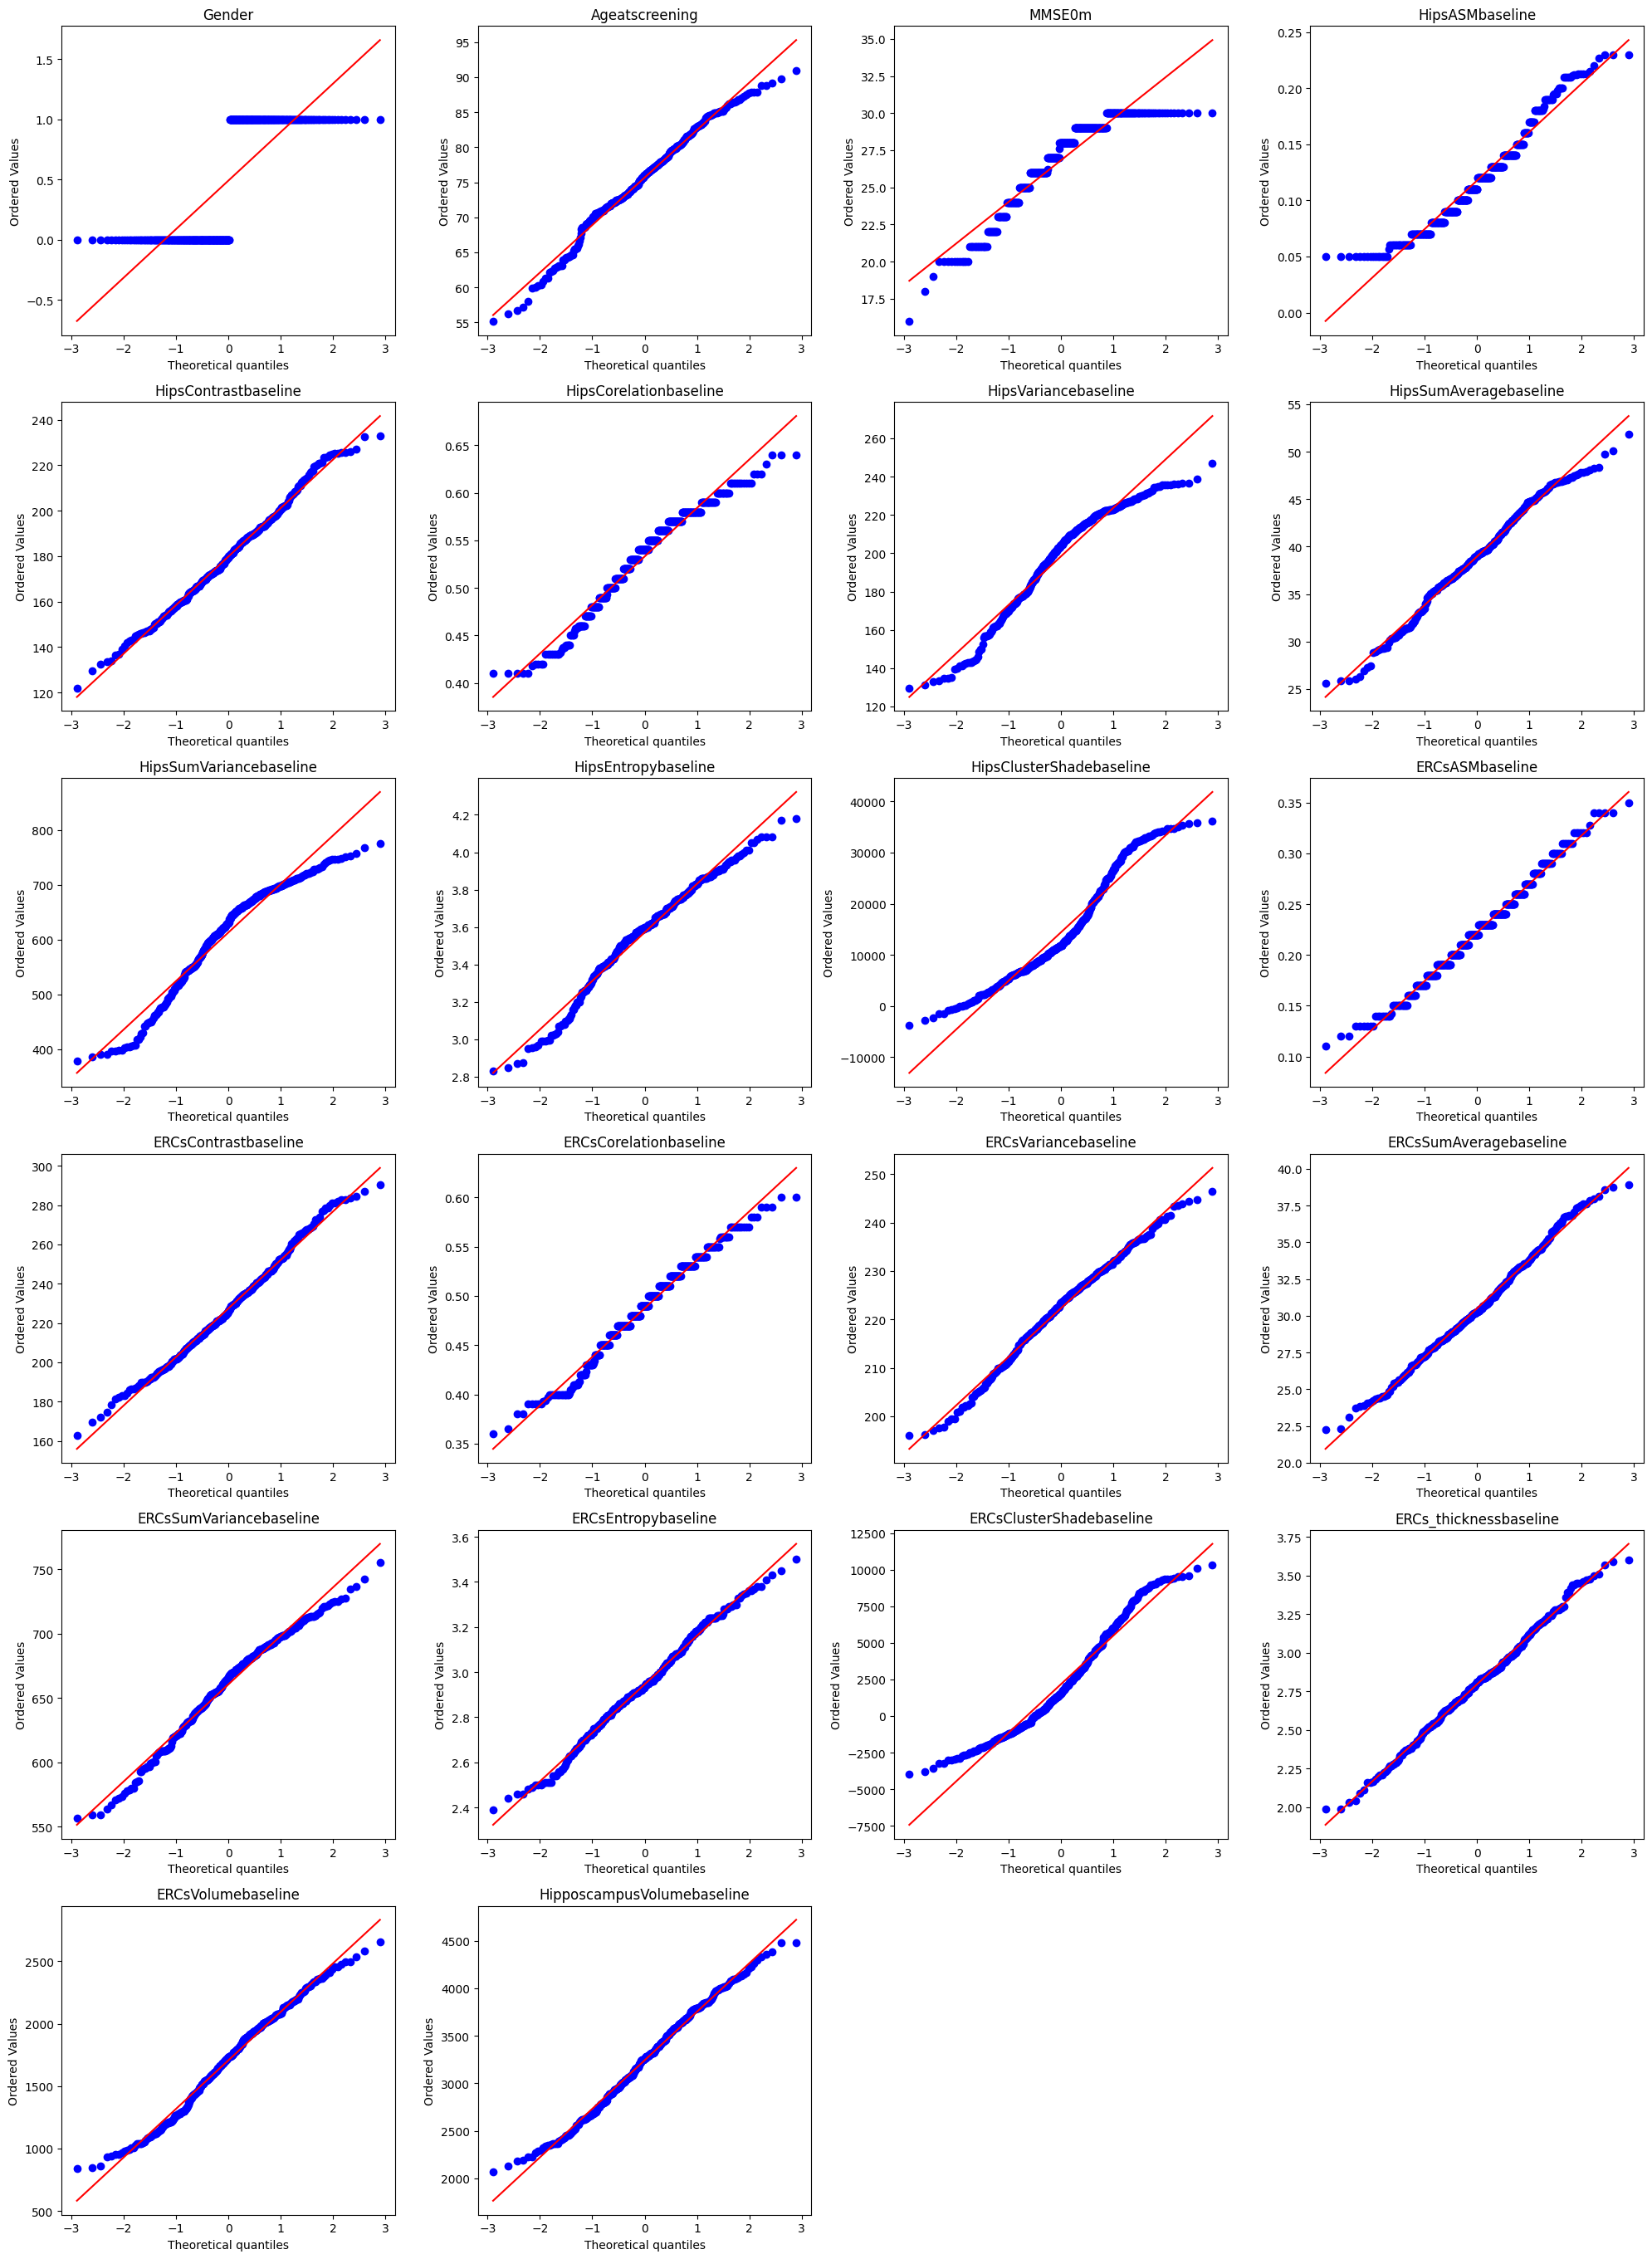

In [27]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_train_missForest_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_train_missForest_t[X_train_missForest_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_train_missForest_t.columns[i])

plt.tight_layout()

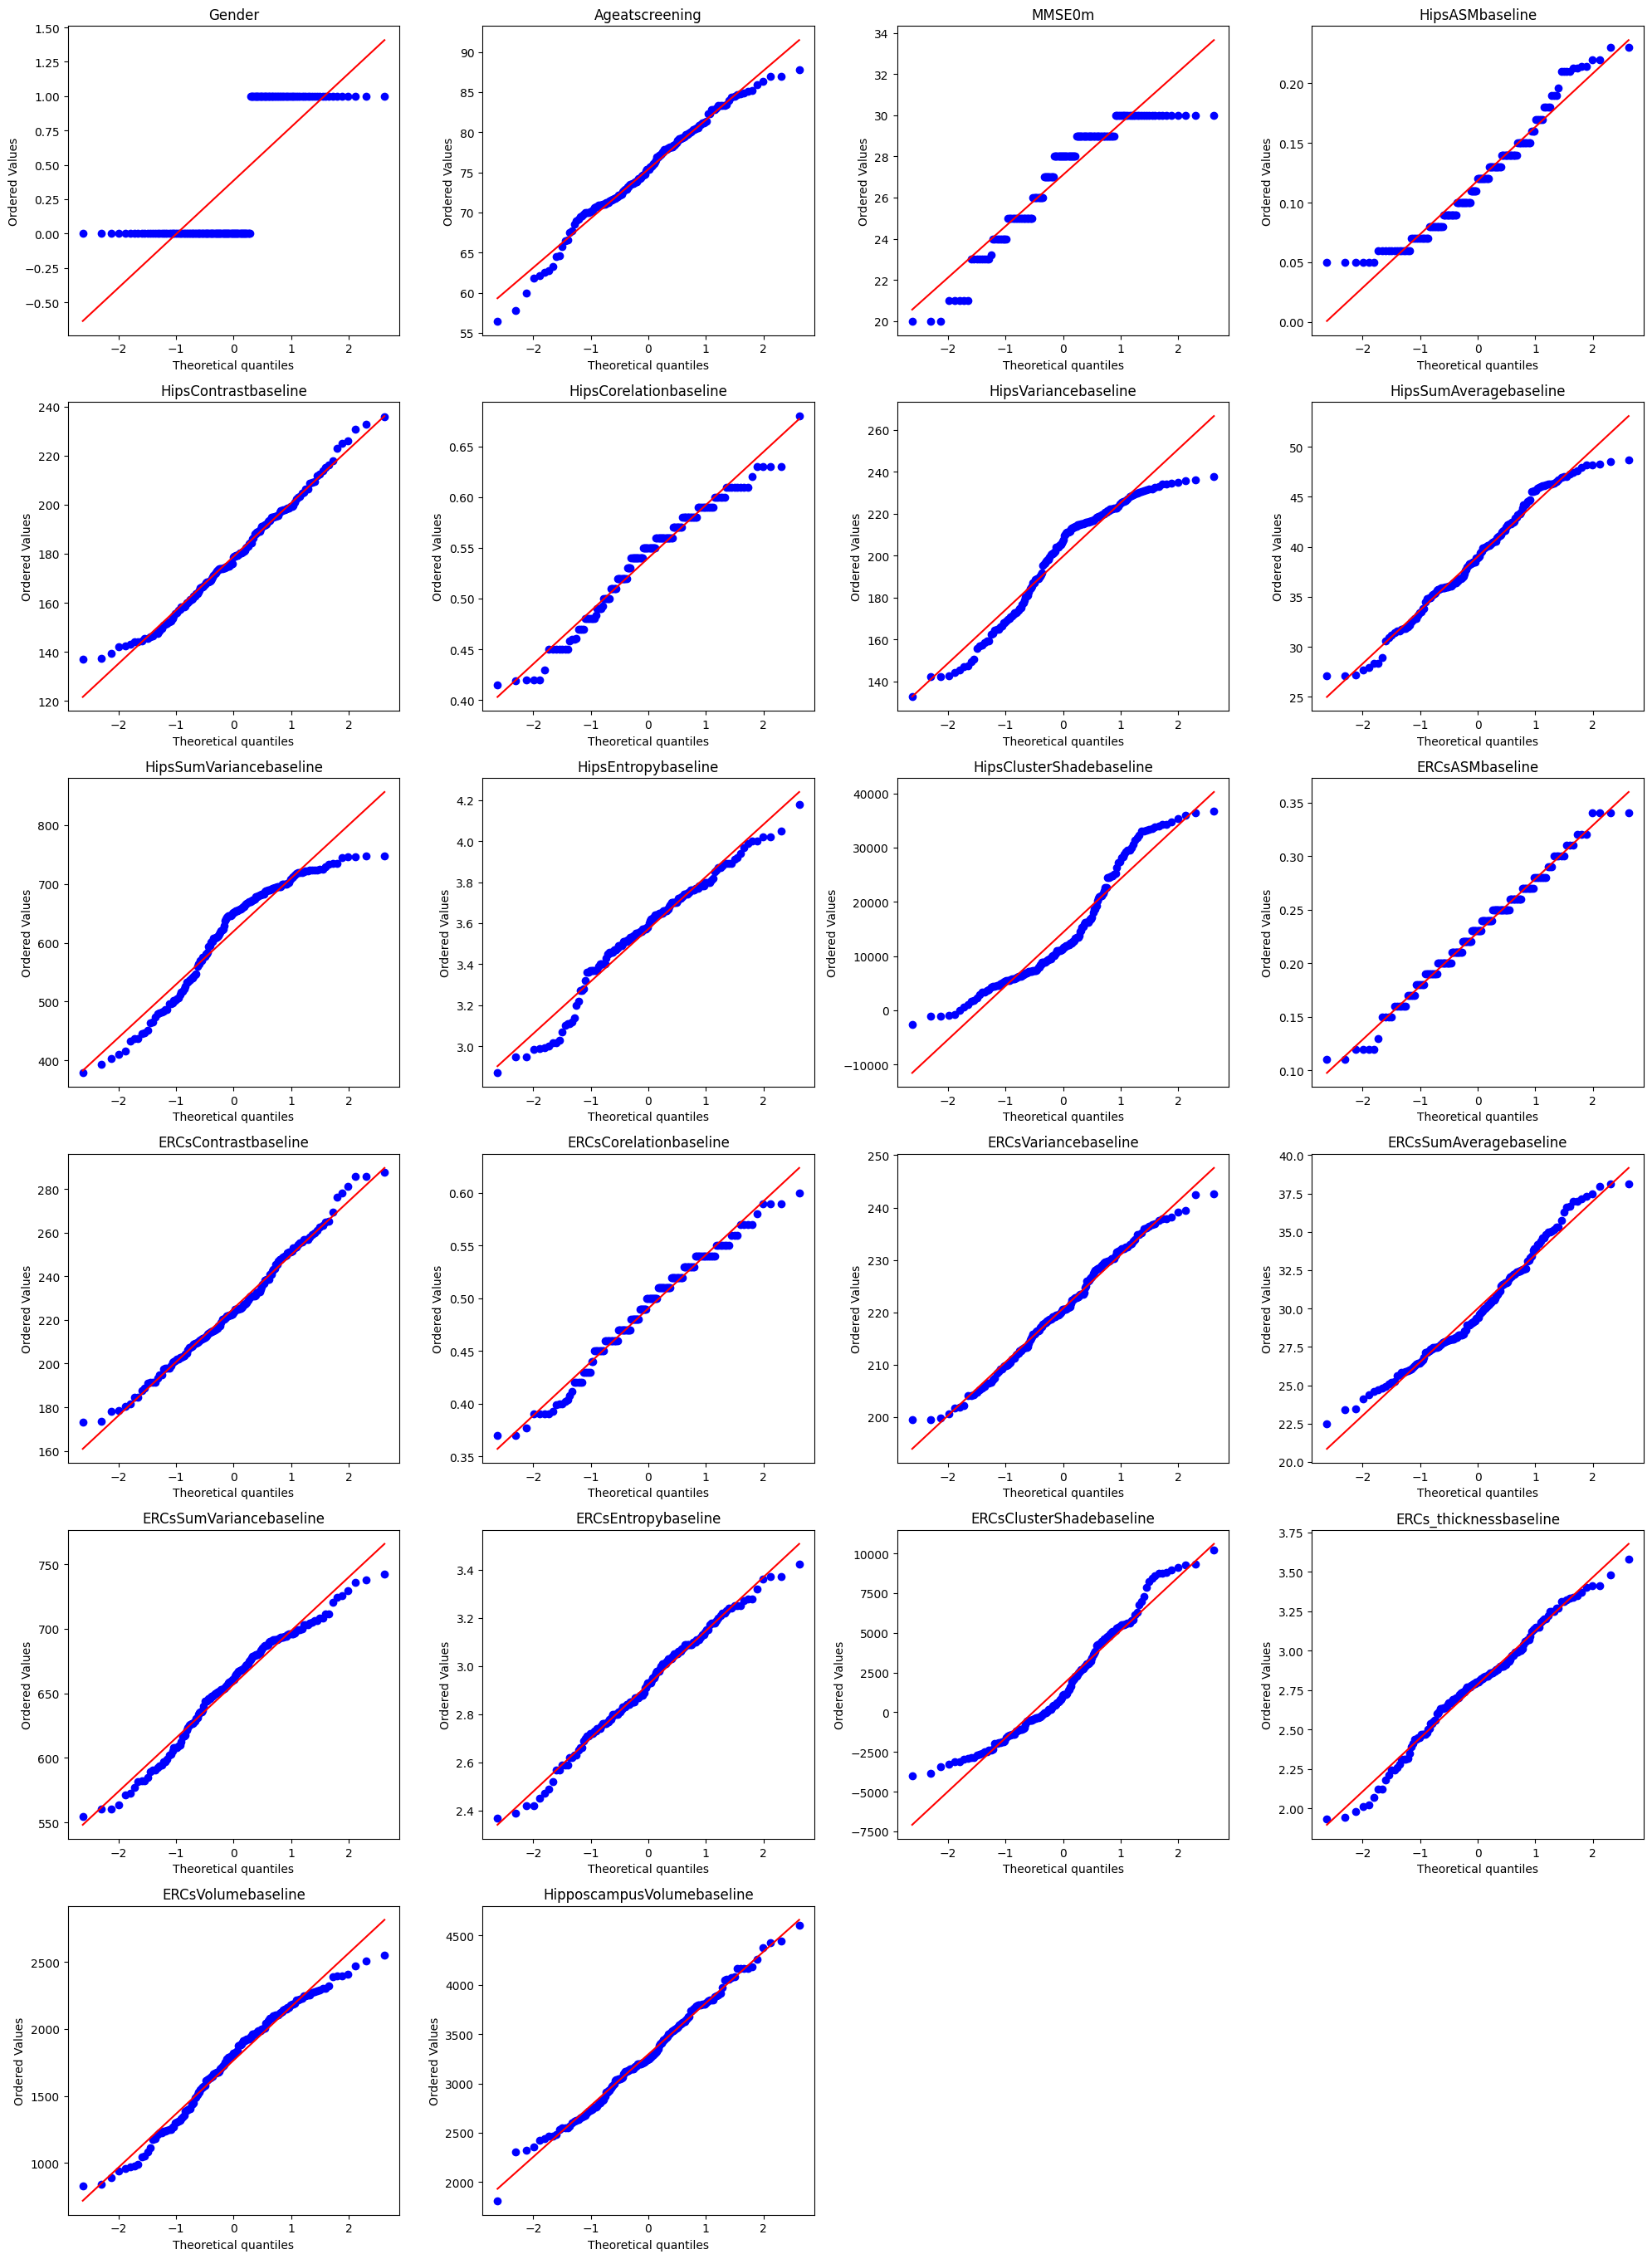

In [28]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_test_missForest_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_test_missForest_t[X_test_missForest_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_test_missForest_t.columns[i])

plt.tight_layout()

### Check for variance change

In [29]:
variance_train_df = pd.DataFrame({"X_train_std": X_train.var(),
              "X_train bayes std": X_train_bayes_t.var(),
              "X_train knn std": X_train_knn_t.var(),
              "X_train nonLin std": X_train_nonLin_t.var(),
              "X_train missForest std": X_train_missForest_t.var(),
            }
)

variance_train_df["Changed_train"] = (variance_train_df.nunique(axis=1) > 1)


variance_test_df = pd.DataFrame({"X_test_std": X_test.var(),
              "X_test bayes std": X_test_bayes_t.var(),
              "X_test knn std": X_test_knn_t.var(),
              "X_test nonLin std": X_test_nonLin_t.var(),
              "X_test missForest std": X_test_missForest_t.var(),
            }
)

variance_test_df["Changed_test"] = (variance_test_df.nunique(axis=1) > 1)

variance_df_report = pd.concat([variance_train_df, variance_test_df], axis=1)
variance_df_report

X_train_std  X_train bayes std  X_train knn std  \
Gender                      2.506176e-01       2.506176e-01     2.506176e-01   
Ageatscreening              4.603116e+01       4.603116e+01     4.603116e+01   
MMSE0m                      8.736355e+00       8.692414e+00     8.695244e+00   
HipsASMbaseline             1.626125e-03       2.182302e-03     1.816457e-03   
HipsContrastbaseline        4.187217e+02       5.108199e+02     4.119166e+02   
HipsCorelationbaseline      2.489974e-03       2.951836e-03     2.505163e-03   
HipsVariancebaseline        6.413123e+02       6.428357e+02     6.475571e+02   
HipsSumAveragebaseline      2.571683e+01       2.586101e+01     2.594955e+01   
HipsSumVariancebaseline     7.778680e+03       7.946077e+03     7.880052e+03   
HipsEntropybaseline         5.694938e-02       7.532624e-02     6.325716e-02   
HipsClusterShadebaseline    8.775235e+07       1.000678e+08     8.647972e+07   
ERCsASMbaseline             2.244121e-03       2.281622e-03     2.236770e-03   
ERCsContrastbaseline        5.670781e+02       7.074393e+02     5.528260e+02   
ERCsCorelationbaseline      2.196946e-03       2.960192e-03     2.116639e-03   
ERCsVariancebaseline        9.786642e+01       9.922022e+01     9.604694e+01   
ERCsSumAveragebaseline      1.016675e+01       1.044348e+01     1.010352e+01   
ERCsSumVariancebaseline     1.366802e+03       1.421779e+03     1.344999e+03   
ERCsEntropybaseline         4.405975e-02       4.809516e-02     4.370711e-02   
ERCsClusterShadebaseline    9.955549e+06       9.882813e+06     9.872749e+06   
ERCs_thicknessbaseline      9.714913e-02       9.614820e-02     9.253897e-02   
ERCsVolumebaseline          1.514996e+05       1.525491e+05     1.494734e+05   
HipposcampusVolumebaseline  2.573259e+05       2.573560e+05     2.507417e+05   

                            X_train nonLin std  X_train missForest std  \
Gender                            2.506176e-01            2.506176e-01   
Ageatscreening                    4.603116e+01            4.603116e+01   
MMSE0m                            8.699251e+00            8.691210e+00   
HipsASMbaseline                   1.863161e-03            1.927097e-03   
HipsContrastbaseline              4.530787e+02            4.532888e+02   
HipsCorelationbaseline            2.652876e-03            2.665013e-03   
HipsVariancebaseline              6.698737e+02            6.694323e+02   
HipsSumAveragebaseline            2.567751e+01            2.611510e+01   
HipsSumVariancebaseline           8.149533e+03            8.205395e+03   
HipsEntropybaseline               6.155420e-02            6.797755e-02   
HipsClusterShadebaseline          9.433903e+07            9.408861e+07   
ERCsASMbaseline                   2.281938e-03            2.277926e-03   
ERCsContrastbaseline              6.072385e+02            6.064612e+02   
ERCsCorelationbaseline            2.434327e-03            2.437059e-03   
ERCsVariancebaseline              1.004579e+02            1.003159e+02   
ERCsSumAveragebaseline            1.044643e+01            1.083433e+01   
ERCsSumVariancebaseline           1.386801e+03            1.434845e+03   
ERCsEntropybaseline               4.529309e-02            4.602817e-02   
ERCsClusterShadebaseline          1.057860e+07            1.131309e+07   
ERCs_thicknessbaseline            1.009762e-01            9.800494e-02   
ERCsVolumebaseline                1.523696e+05            1.510789e+05   
HipposcampusVolumebaseline        2.638993e+05            2.593439e+05   

                            Changed_train    X_test_std  X_test bayes std  \
Gender                              False  2.385310e-01      2.385310e-01   
Ageatscreening                      False  3.748058e+01      3.748058e+01   
MMSE0m                               True  6.778540e+00      6.735419e+00   
HipsASMbaseline                      True  1.752680e-03      2.226878e-03   
HipsContrastbaseline                 True  4.613699e+02      4.813111e+02   
HipsCorelationbaseline 

In [30]:
print(variance_df_report["Changed_train"].value_counts())
print(variance_df_report["Changed_test"].value_counts())

Changed_train
True     20
False     2
Name: count, dtype: int64
Changed_test
True     18
False     4
Name: count, dtype: int64


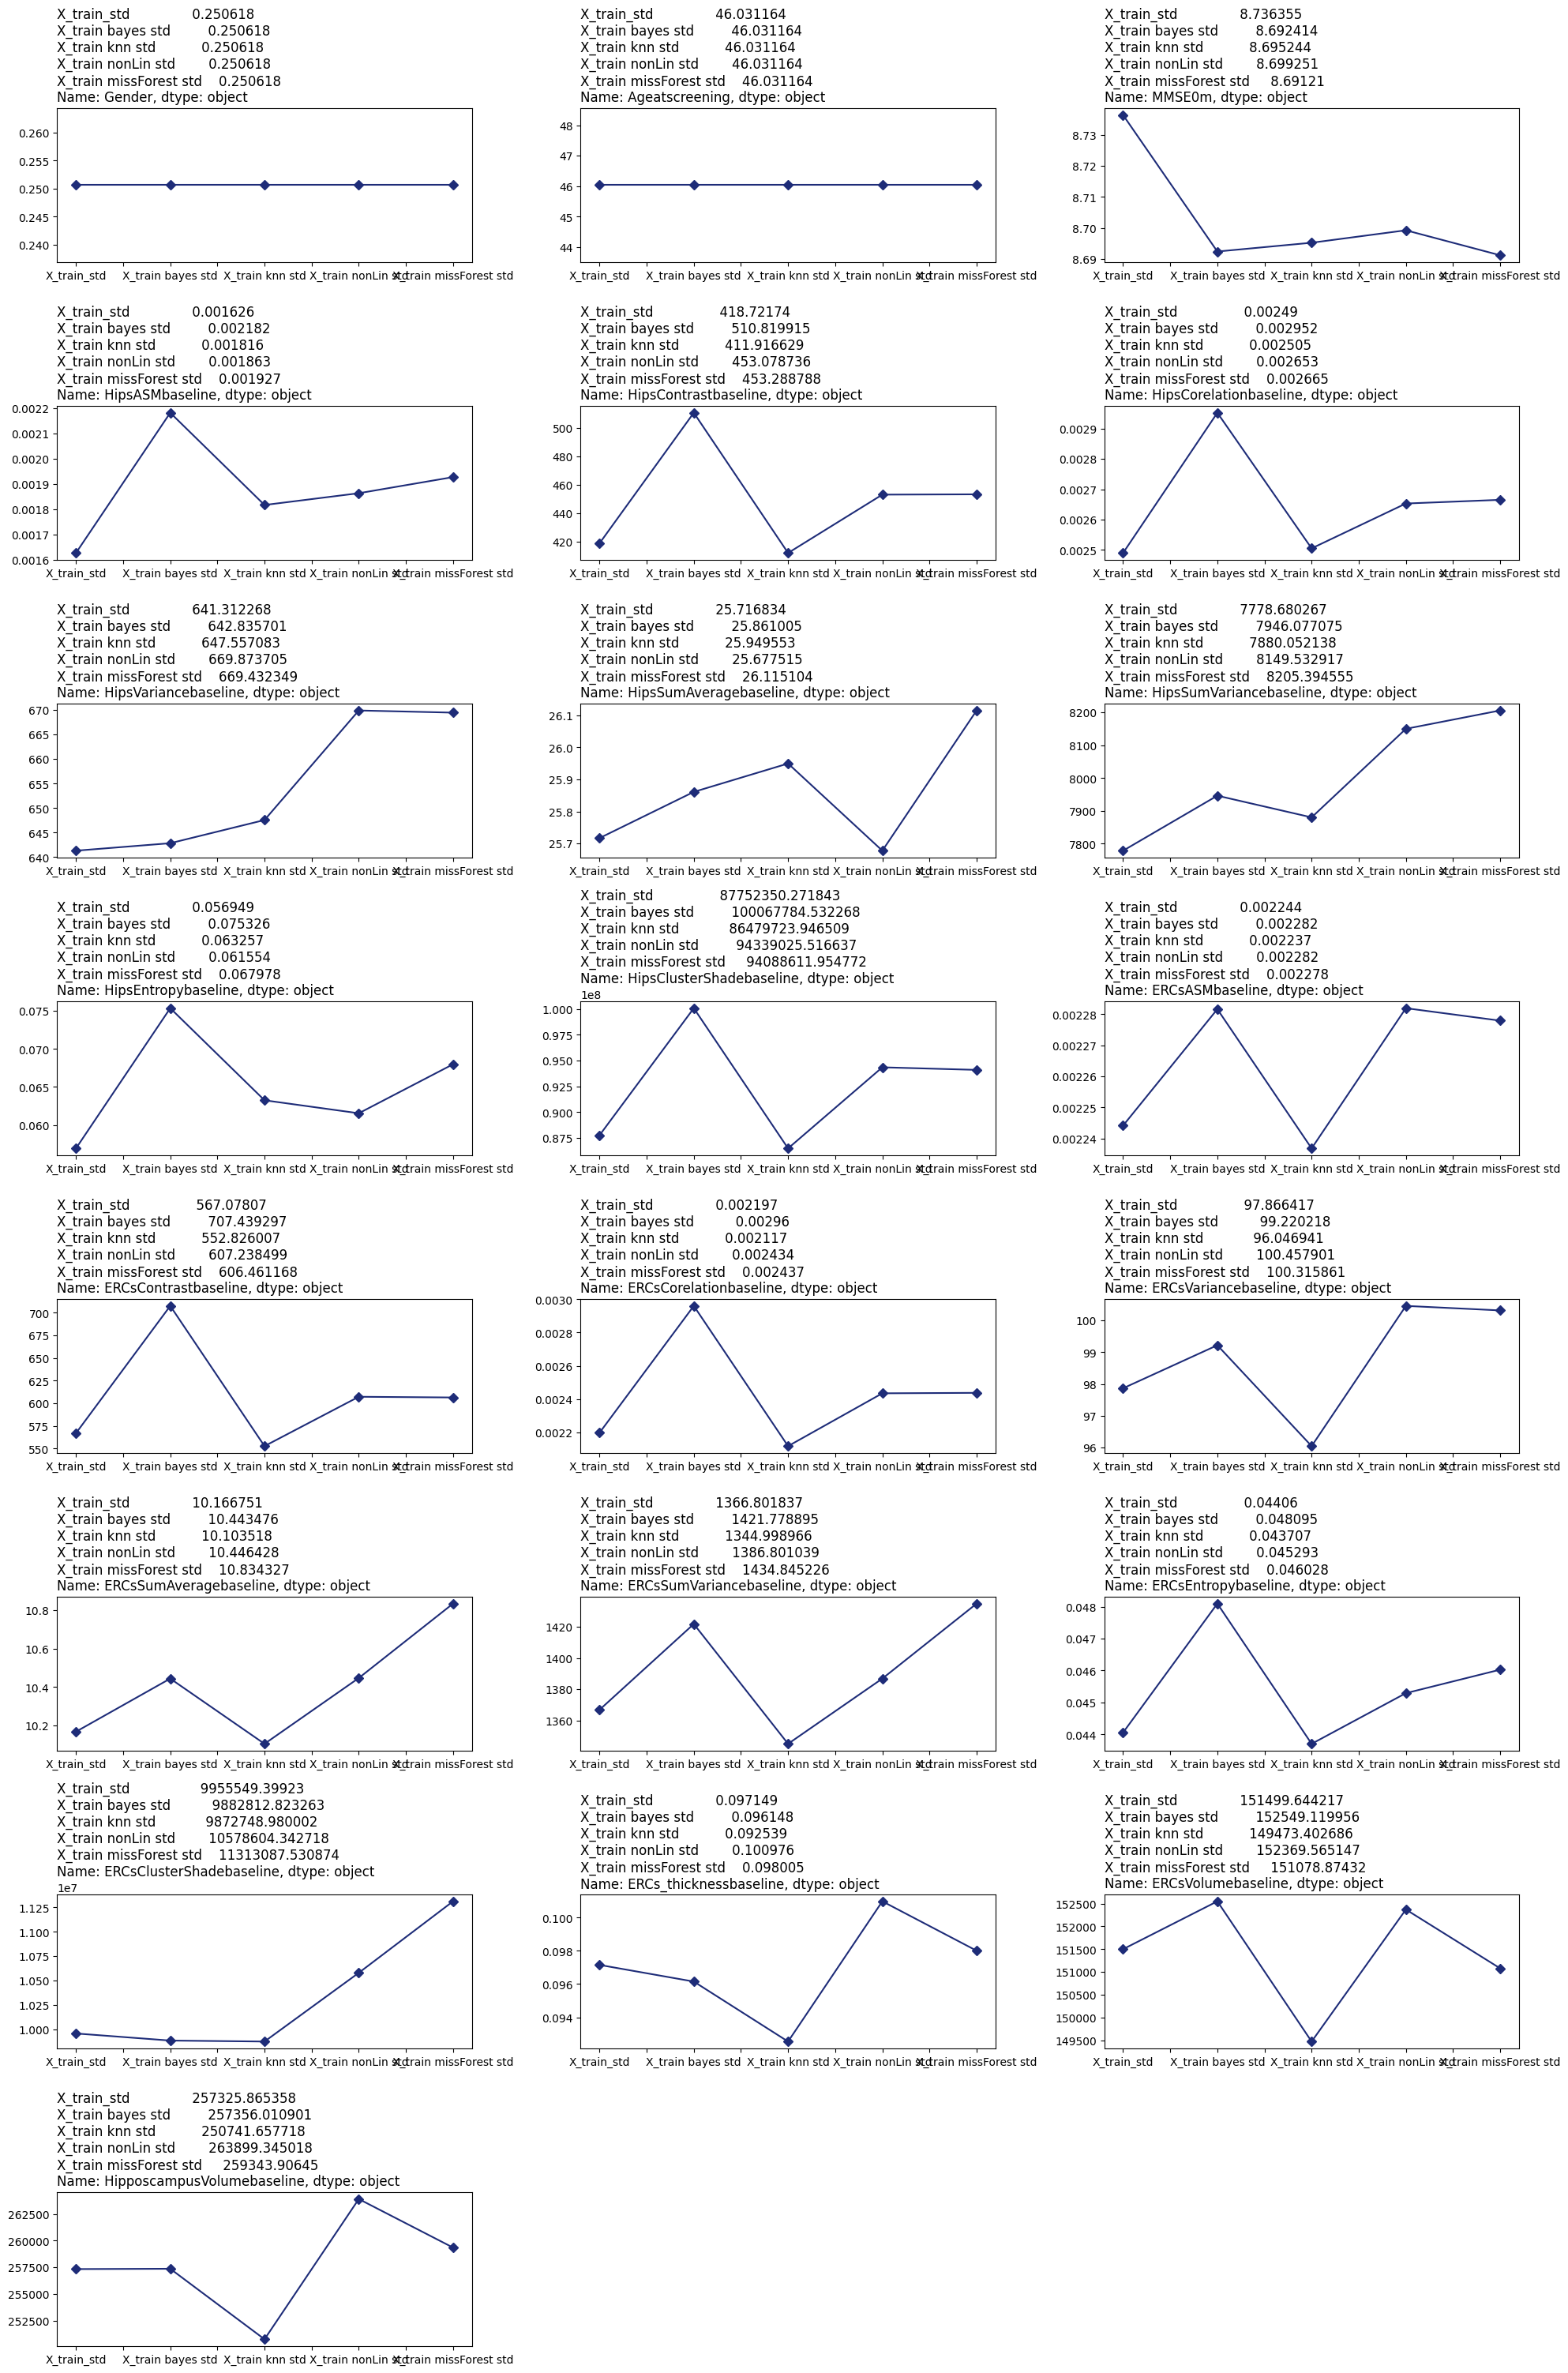

In [31]:
plt.figure(figsize=(20, 45))

for i in range(len(variance_df_report)):
    plt.subplot(12,3,i+1)
    variance_df_report.iloc[i].drop(["Changed_train", 
                                    "X_test_std",
                                    "X_test bayes std",
                                    "X_test knn std",
                                    "X_test nonLin std",
                                    "X_test missForest std",
                                    "Changed_test"]).plot(kind="line",
                                   color="#1e2c78",
                                   marker="D",
                                   label=i,
    )
    plt.title(variance_df_report.iloc[i].drop(["Changed_train", 
                                    "X_test_std",
                                    "X_test bayes std",
                                    "X_test knn std",
                                    "X_test nonLin std",
                                    "X_test missForest std",
                                    "Changed_test"]), loc="left")

plt.tight_layout()

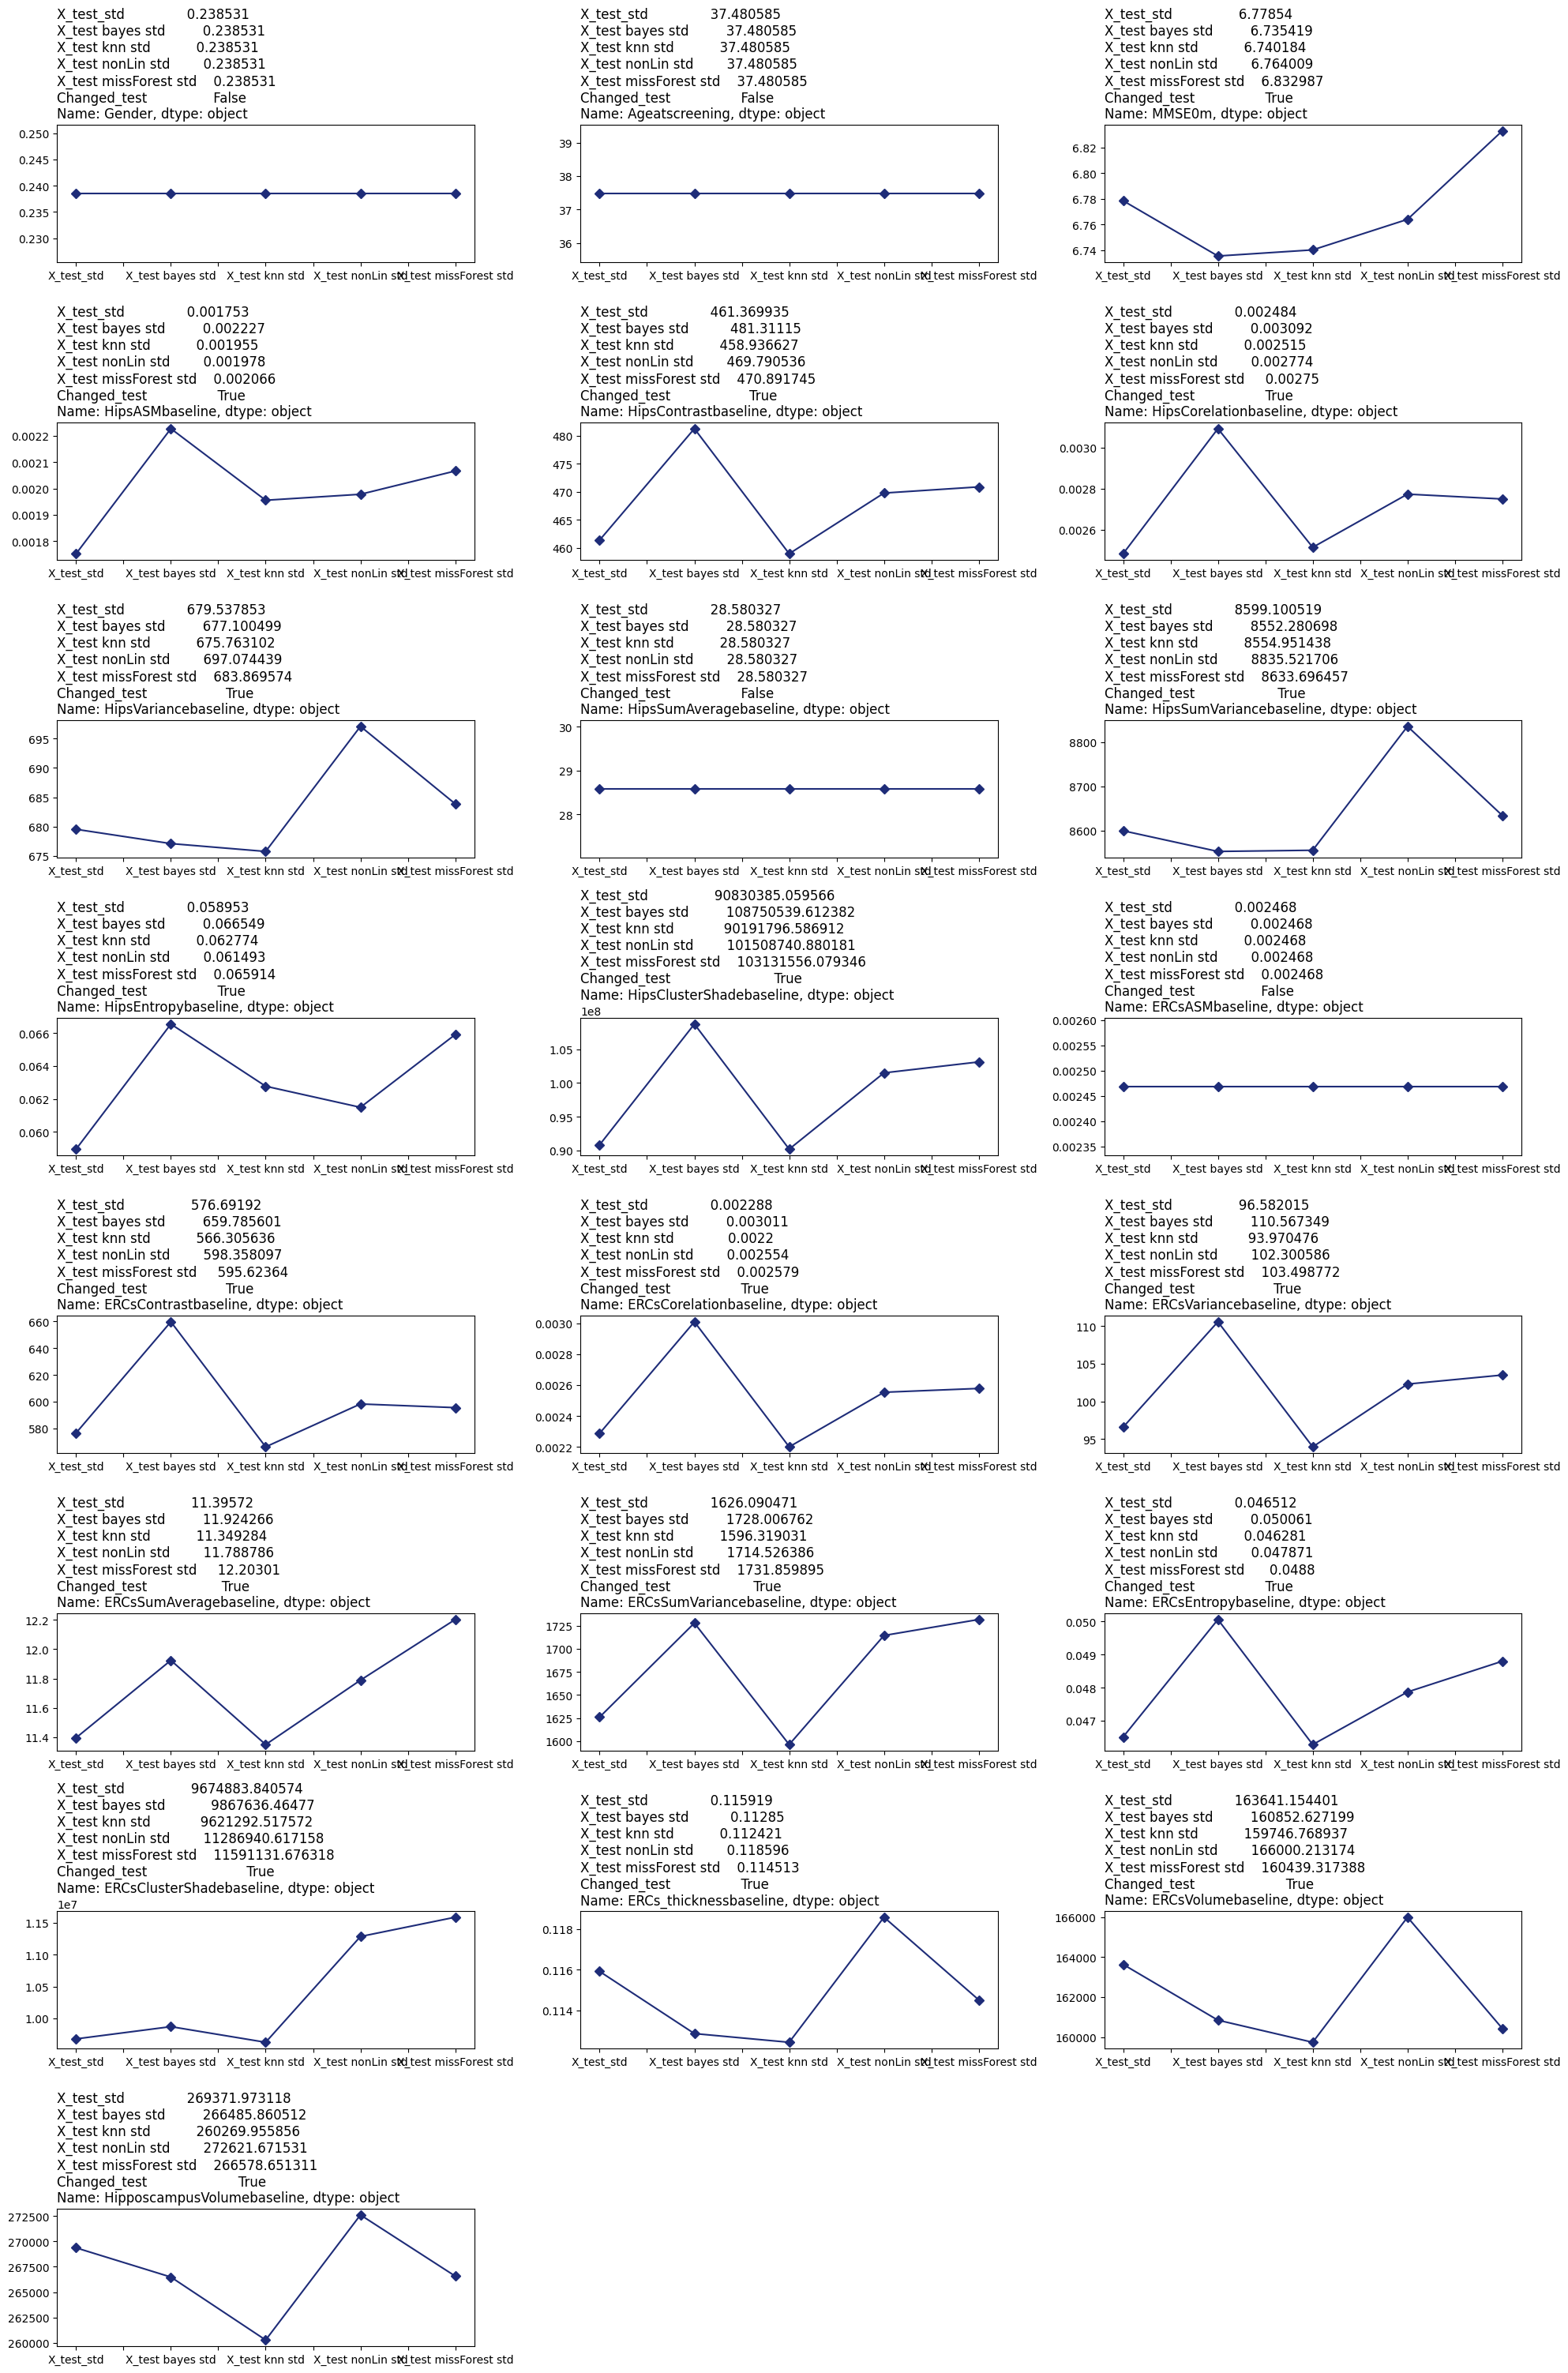

In [32]:
plt.figure(figsize=(20, 45))

for i in range(len(variance_df_report)):
    plt.subplot(12,3,i+1)
    variance_df_report.iloc[i].drop(["Changed_train", 
                                    "X_train_std",
                                    "X_train bayes std",
                                    "X_train knn std",
                                    "X_train nonLin std",
                                    "X_train missForest std",
                                    "Changed_test"]).plot(kind="line",
                                   color="#1e2c78",
                                   marker="D",
                                   label=i,
    )
    plt.title(variance_df_report.iloc[i].drop(["Changed_train", 
                                    "X_train_std",
                                    "X_train bayes std",
                                    "X_train knn std",
                                    "X_train nonLin std",
                                    "X_train missForest std",
                                    "Changed_train"]), loc="left")

plt.tight_layout()